#**Step 0:**  Restart the session



It’s always a good practice to restart the session and to remove all the temporary variables from the interactive development environment before we start coding.

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

# **Step 1:** Import relevant libraries



Import all the relevant python libraries for building supervised machine learning algorithms.

In [2]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import brier_score_loss
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib


# **Step 2:** Set up the current working directory



With Google Colab

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"

With working repository

In [5]:
# Import the os module
import os

os.getcwd()

'/home/pabloroldan/PycharmProjects/prueba_AilyLabs'

# **Step 3:** Import the dataset

With Google Colab

In [6]:
# test = pd.read_csv('/content/drive/MyDrive/Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_test_data.csv')
# test_hist = pd.read_csv('/content/drive/MyDrive/Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_test_hist_data.csv')
# train = pd.read_csv('/content/drive/MyDrive/Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_training_data.csv')
# train_hist = pd.read_csv('/content/drive/MyDrive/Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_training_hist_data.csv')
# output = pd.read_csv('/content/drive/MyDrive/Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_test_output_template.csv')
# outputTrain = pd.read_csv('/content/drive/MyDrive/Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_training_output.csv')


With working repository

In [7]:
test = pd.read_csv('Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_test_data.csv')
test_hist = pd.read_csv('Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_test_hist_data.csv')
train = pd.read_csv('Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_training_data.csv')
train_hist = pd.read_csv('Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_training_hist_data.csv')
output = pd.read_csv('Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_test_output_template.csv')
outputTrain = pd.read_csv('Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_training_output.csv')

In [8]:
print(f'Test_Shape: {test.shape},Train_Shape: {train.shape}')
display(test.sample(2))
display(train.sample(2))

print(f'test_hist_Shape: {test_hist.shape},train_hist_Shape: {train_hist.shape}')
display(test_hist.sample(2))
display(train_hist.sample(2))

print(f'Output_Shape: {output.shape},OutputTrain_Shape: {outputTrain.shape}')
display(output.sample(2))
display(outputTrain.sample(2))

Test_Shape: (4024, 32),Train_Shape: (16096, 32)


,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power
3715,9c1ba8a5307f1ca54a7e4993dfa4445a,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,10477,0,647,2010-07-06,2016-07-06,NaN,2010-07-06,2015-07-07,NaN,NaN,NaN,NaN,579.015308,373.636012,0.0,24.370279,0.162713,0.000000,36.304427,f,47.647135,24.289196,23.096623,1,47.851071,6,lxidpiddsbxsbosboudacockeimpuepw,15.503252
3542,ea6916055756263bc068371e81422145,ilkfsaapsxpkcpswbllddfmpamwelpxi,NaN,NaN,32533,30006,0,2010-01-19,2016-02-21,NaN,2010-01-19,2015-02-23,NaN,NaN,NaN,NaN,2222.950937,0.000000,0.0,97.697225,0.131269,0.071603,33.269175,t,0.000000,37.256734,35.427469,2,258.626665,6,lxidpiddsbxsbosboudacockeimpuepw,22.287043


,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power
7322,4502e2a4258662fb59d7af3d35ae84a3,NaN,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,6725,0,1275,2012-05-31,2016-05-31,NaN,2012-05-31,2015-06-23,NaN,NaN,NaN,NaN,358.996427,1548.993892,0.0,26.909185,0.209055,0.045380,29.744311,f,123.779054,39.738295,35.931878,1,31.645935,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.346335
4473,dbd438cbcb2311a204099a211ecd45f0,ckfxocssowaeipxueikxcmaxdmcduxsa,NaN,usilxuppasemubllopkaafesmlibmsdf,30962,30116,1186,2012-01-13,2016-06-24,2012-01-13,2015-06-24,2015-01-15,195.048181,365.703758,4895.405773,225.067559,1454.061410,1441.790796,0.0,99.208188,0.138672,0.047991,27.257522,t,102.161011,28.544409,25.810223,3,131.692078,4,lxidpiddsbxsbosboudacockeimpuepw,25.038012


test_hist_Shape: (48236, 8),train_hist_Shape: (193002, 8)


,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
32784,50b3c793ffdab58f3ad33319399bfd2d,2015-09-01,0.130462,0.0,0.0,40.087205,0.0,0.0
19517,c7c8ee9daf2a864d159d45a2373ada72,2015-03-01,0.135534,0.0,0.0,39.926856,0.0,0.0


,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
63285,0cada1da2360fbeb654c5ad73dc603e0,2015-10-01,0.130671,0.000000,0.000000,40.087205,0.000000,0.000000
134054,d7b0e375b206325504d8256270a5c6d1,2015-11-01,0.106848,0.079718,0.094958,36.735692,18.466007,12.349485


Output_Shape: (4024, 3),OutputTrain_Shape: (16096, 2)


,contract_id,does_churn,prob_of_churn
250,6b8afa134fbd4eef714d11aac3d1e91e,NaN,NaN
709,b52a00c2e407c04856bf5f412cab350b,NaN,NaN


,contract_id,has_churned_over_next_3m
9018,12be28d72006b73015a2bd06db83c640,0
8157,2b1eb9c765013acf5926011c7ca093c8,0


# **Step 4:** Check target variable distribution: Let’s look at the distribution of churn values.

Lets Add the output for the training as a new column for the train data.

In [9]:
og_train=train
train = pd.merge(train, outputTrain, on="contract_id")
print(f'Train_Shape: {train.shape}') # Should be (16096, 33)
display(train.sample(2)) # Now with "has_churned_over_next_3m"

Train_Shape: (16096, 33)


,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
7221,10e5d21aa62d3d437e80f22d484838cc,cxfwwicdxfwpebofockoweifmbxdkkcd,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,395055,0,20846,2011-04-07,2016-11-14,NaN,2011-04-07,2015-11-17,NaN,NaN,NaN,NaN,10090.716044,13635.688754,0.000000,98.531141,0.139908,0.049123,27.257522,f,954.996619,-10.960680,-9.910788,1,701.056302,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,47.572223,0
4690,f6a73106277dd0dab606b503439bfc75,ckfxocssowaeipxueikxcmaxdmcduxsa,NaN,foosdfpfkusacimwkcsosbicdxkicaua,17840,0,1147,2011-03-25,2016-07-07,NaN,2015-07-07,2015-03-26,NaN,NaN,NaN,NaN,1527.031797,1392.731752,15.460479,9.506300,0.251218,0.000000,30.748175,f,213.728400,50.045999,45.252237,2,69.579437,5,lxidpiddsbxsbosboudacockeimpuepw,17.346335,0


Lets see how many churned.

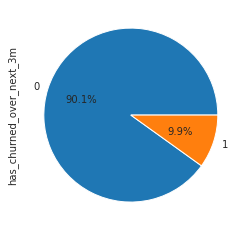

In [10]:
global_churn_distribution = pd.value_counts(train['has_churned_over_next_3m']).plot.pie(autopct='%1.1f%%')

# **Step 5:** Populate train data (with historical data)


Add to the train data the historical data so that we only have 1 train data with hist.

In [11]:
train_hist["contract_id"].count()

193002

In [12]:
train_hist["contract_id"].nunique()

16096

We can't since the data is divided by months, so we need to find a way to fuse/merge those months, so that it has only 16096 rows

Since we dont want to have 2000 columns, lets try to understand the data

In [13]:
train_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   contract_id              193002 non-null  object 
 1   reference_date           193002 non-null  object 
 2   price_energy_1st_period  191643 non-null  float64
 3   price_energy_2nd_period  191643 non-null  float64
 4   price_energy_3rd_period  191643 non-null  float64
 5   price_power_1st_period   191643 non-null  float64
 6   price_power_2nd_period   191643 non-null  float64
 7   price_power_3rd_period   191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [14]:
train_hist.describe()

,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.127477,0.043164,0.039137,39.077768,8.084069,4.893413
std,0.022710,0.039691,0.046303,4.904798,9.714639,5.899199
min,0.000000,0.000000,0.000000,-0.160349,-0.073866,-0.049402
25%,0.113901,0.000000,0.000000,36.735692,0.000000,0.000000
50%,0.132036,0.067813,0.000000,39.926855,0.000000,0.000000
75%,0.137101,0.080741,0.092463,40.087205,18.392143,12.300087
max,0.253795,0.182288,0.145403,53.616556,27.574100,13.233853


In [15]:
# Check data with null values on any of the other columns
train_hist_null = train_hist[train_hist.isnull().any(axis=1)].index.values.tolist()

# Get the null values data
null_values = train_hist.iloc[train_hist_null,:]

null_values

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
10,b75676b1a8a46b9082f3b15cb2621ea4,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
71,eec152fd197128156da8ca74d56e0db1,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
119,944885335d2bfc6a3dc0b3c6a8dce0ae,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN
323,eea4450231d968e322a87a3635bc39e8,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
468,c6fa202f0c48c936221ca0528ea80cf7,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
191792,f463991e51e640bf2f6889361581bc85,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN
191808,71b0e9c3227a8e0b0126b85fd1729cfb,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
191842,72d4dafa88f1844cbbcd4abf8c490721,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
192179,3f871fa91f9cdee7ee4a94421863aad4,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Lets check if when 1 is missing, all are missing (except for 'contract_id' and 'reference_date')
null_values.isnull().all()

contract_id                False
reference_date             False
price_energy_1st_period     True
price_energy_2nd_period     True
price_energy_3rd_period     True
price_power_1st_period      True
price_power_2nd_period      True
price_power_3rd_period      True
dtype: bool

Seems like when Values are missing, they are missing everywhere.

Let's see if the elements with null have a different churn rate. If they do, it should be reflected as a variable in some way.

In [17]:
null_values = pd.merge(null_values, outputTrain, on="contract_id").groupby(['contract_id']).mean() # We groupby since we don't want repeated values (the .mean() would be == .sum() since all of them are null)

<AxesSubplot:ylabel='has_churned_over_next_3m'>

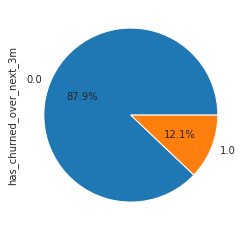

In [18]:
pd.value_counts(null_values['has_churned_over_next_3m']).plot.pie(autopct='%1.1f%%')

The churn rate is similar enough to the original data (90.1%-9.9% vs 87.9%-12.1%), so we will not put a varible to show tht the data hd null values (also for simplicity).

 Lets see how to fill those missing values now.

In [19]:
# Check data with Zero values on all of the other rows
train_hist_zero = train_hist.drop(['contract_id', 'reference_date'], axis=1)
train_hist_zero = train_hist[(train_hist_zero==0).all(axis=1)].index.values.tolist()

# Get the zero values data
zero_values = train_hist.iloc[train_hist_zero,:]
# non_zero_values = train_hist.iloc[train_hist.index.difference(train_hist_zero),:]

zero_values

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
209,7e0de8efc00ae1159b79e88b4ffc3513,2015-10-01,0.0,0.0,0.0,0.0,0.0,0.0
656,762cab733464cae4ce1d452ce84cb94b,2015-03-01,0.0,0.0,0.0,0.0,0.0,0.0
784,d9fba4b0af7c2cfe78d352aadadfd8e6,2015-11-01,0.0,0.0,0.0,0.0,0.0,0.0
957,2bcc39c657a0848bb383c381b3d34e56,2015-05-01,0.0,0.0,0.0,0.0,0.0,0.0
1125,cd6ffa8c5421d53e884c83b02f42100f,2015-10-01,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
190637,de68297735552b638730abc1a4481a37,2015-05-01,0.0,0.0,0.0,0.0,0.0,0.0
191467,c89261a0d934d2257420fff7292db0c0,2015-09-01,0.0,0.0,0.0,0.0,0.0,0.0
192057,c540011d14868ed9c00b9f94b9bc2327,2015-11-01,0.0,0.0,0.0,0.0,0.0,0.0
192539,3f6e2c86b32a1e2c4881fb5ae9566619,2015-10-01,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
zero_values.nunique()

contract_id                59
reference_date             12
price_energy_1st_period     1
price_energy_2nd_period     1
price_energy_3rd_period     1
price_power_1st_period      1
price_power_2nd_period      1
price_power_3rd_period      1
dtype: int64

There are lots of repetitions in the values that are filled with 0s, maybe its because they stopped using the service, lets check it

In [21]:
zero_values = pd.merge(zero_values, outputTrain, on="contract_id").groupby(['contract_id']).mean() # We groupby since we don't want repeated values (the .mean() would be == .sum() since all of them are 0)

<AxesSubplot:ylabel='has_churned_over_next_3m'>

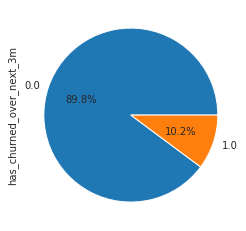

In [22]:
pd.value_counts(zero_values['has_churned_over_next_3m']).plot.pie(autopct='%1.1f%%')

The churn rate is almost identical to the original data (90.1%-9.9% vs 89.8%-10.2%). That means that having all 0 doesn't affect the churn rate so it's okay to fill the null values with 0.

In [23]:
train_hist = train_hist.fillna(0)

We are going to make the historical be all in 1 row for every contract_id, so all the values are unique

In [24]:
def make_hist_data_unique(hist_data):
  column_names = list(hist_data.columns)
  
  dict_hist_data = {}

  for index, row in hist_data.iterrows():
    dict_hist_data[row["contract_id"]] = {}

  for index, row in hist_data.iterrows():
    month = row["reference_date"].split("-")[1]
    new_row = {}
    column_index = 2
    for column in row[2:]:
      new_row[month+"_"+column_names[column_index]] = column
      column_index += 1
    dict_hist_data[row["contract_id"]].update(new_row)
  
  hist_unique_data = pd.DataFrame.from_dict(dict_hist_data, orient='index', )

  hist_unique_data = hist_unique_data.reset_index()
  hist_unique_data.rename(columns = {'index':'contract_id'}, inplace = True)
  hist_unique_data = hist_unique_data.reindex(sorted(hist_unique_data.columns), axis=1)
  hist_unique_data = hist_unique_data.fillna(0)
  return hist_unique_data


In [25]:
train_hist_unique = make_hist_data_unique(train_hist)
train_hist_unique

,01_price_energy_1st_period,01_price_energy_2nd_period,01_price_energy_3rd_period,01_price_power_1st_period,01_price_power_2nd_period,01_price_power_3rd_period,02_price_energy_1st_period,02_price_energy_2nd_period,02_price_energy_3rd_period,02_price_power_1st_period,02_price_power_2nd_period,02_price_power_3rd_period,03_price_energy_1st_period,03_price_energy_2nd_period,03_price_energy_3rd_period,03_price_power_1st_period,03_price_power_2nd_period,03_price_power_3rd_period,04_price_energy_1st_period,04_price_energy_2nd_period,04_price_energy_3rd_period,04_price_power_1st_period,04_price_power_2nd_period,04_price_power_3rd_period,05_price_energy_1st_period,05_price_energy_2nd_period,05_price_energy_3rd_period,05_price_power_1st_period,05_price_power_2nd_period,05_price_power_3rd_period,06_price_energy_1st_period,06_price_energy_2nd_period,06_price_energy_3rd_period,06_price_power_1st_period,06_price_power_2nd_period,06_price_power_3rd_period,07_price_energy_1st_period,07_price_energy_2nd_period,07_price_energy_3rd_period,07_price_power_1st_period,07_price_power_2nd_period,07_price_power_3rd_period,08_price_energy_1st_period,08_price_energy_2nd_period,08_price_energy_3rd_period,08_price_power_1st_period,08_price_power_2nd_period,08_price_power_3rd_period,09_price_energy_1st_period,09_price_energy_2nd_period,09_price_energy_3rd_period,09_price_power_1st_period,09_price_power_2nd_period,09_price_power_3rd_period,10_price_energy_1st_period,10_price_energy_2nd_period,10_price_energy_3rd_period,10_price_power_1st_period,10_price_power_2nd_period,10_price_power_3rd_period,11_price_energy_1st_period,11_price_energy_2nd_period,11_price_energy_3rd_period,11_price_power_1st_period,11_price_power_2nd_period,11_price_power_3rd_period,12_price_energy_1st_period,12_price_energy_2nd_period,12_price_energy_3rd_period,12_price_power_1st_period,12_price_power_2nd_period,12_price_power_3rd_period,contract_id
0,0.136157,0.000000,0.0,39.926856,0.0,0.0,0.136157,0.000000,0.0,39.926856,0.0,0.0,0.136157,0.000000,0.0,39.926856,0.0,0.0,0.137643,0.000000,0.00000,40.087205,0.000000,0.000000,0.137643,0.000000,0.000000,40.087205,0.000000,0.000000,0.137643,0.000000,0.000000,40.087205,0.000000,0.000000,0.137643,0.000000,0.000000,40.087205,0.000000,0.000000,0.133609,0.000000,0.000000,40.087205,0.000000,0.000000,0.133609,0.000000,0.000000,40.087205,0.000000,0.000000,0.133609,0.000000,0.000000,40.087205,0.000000,0.000000,0.133609,0.000000,0.000000,40.087205,0.000000,0.000000,0.133609,0.000000,0.000000,40.087205,0.000000,0.000000,cd7ad4a23c39fd588bf326333786300c
1,0.134560,0.000000,0.0,39.926856,0.0,0.0,0.134560,0.000000,0.0,39.926856,0.0,0.0,0.134560,0.000000,0.0,39.926856,0.0,0.0,0.134560,0.000000,0.00000,39.926856,0.000000,0.000000,0.134560,0.000000,0.000000,39.926856,0.000000,0.000000,0.134560,0.000000,0.000000,39.926855,0.000000,0.000000,0.135179,0.000000,0.000000,40.087205,0.000000,0.000000,0.131144,0.000000,0.000000,40.087205,0.000000,0.000000,0.131144,0.000000,0.000000,40.087205,0.000000,0.000000,0.131144,0.000000,0.000000,40.087205,0.000000,0.000000,0.131144,0.000000,0.000000,40.087205,0.000000,0.000000,0.131144,0.000000,0.000000,40.087205,0.000000,0.000000,73c63df734c0948948b61dcab3153dce
2,0.153324,0.067422,0.0,39.926856,0.0,0.0,0.153324,0.067422,0.0,39.926856,0.0,0.0,0.153324,0.067422,0.0,39.926856,0.0,0.0,0.153716,0.069080,0.00000,39.926856,0.000000,0.000000,0.153716,0.069080,0.000000,39.926856,0.000000,0.000000,0.153716,0.069080,0.000000,39.926856,0.000000,0.000000,0.153716,0.069080,0.000000,39.926855,0.000000,0.000000,0.149532,0.068483,0.000000,39.926855,0.000000,0.000000,0.149532,0.068483,0.000000,39.926855,0.000000,0.000000,0.149532,0.068483,0.000000,39.926855,0.000000,0.000000,0.149532,0.068483,0.000000,39.926855,0.000000,0.000000,0.149532,0.068483,0.000000,39.926855,0.000000,0.000000,75d7981514dd168b8ca9954c62342426
3,0.136157,0.000000,0.0,39.926856,0.0,0.0,0.136157,0.000000,0.0,39.926856,0.0,0.0,0.136157,0.000000,0.0,39.926856,0.0,0.0,0.137101,0

For the sake of simplicity, we will do the aggregate the semesters, so we don't have 6x12 columns, only 2x12, one for price_energy and anothe for price_power

In [26]:
# Add the prices, looking at the data, it seemed more comparable if 2nd are 3rd period are multiplied by 0.1
train_hist['price_energy'] = train_hist['price_energy_1st_period'] + train_hist['price_energy_2nd_period']*0.1 + train_hist['price_energy_3rd_period']*0.1
train_hist['price_power'] = train_hist['price_power_1st_period'] + train_hist['price_power_2nd_period']*0.1 + train_hist['price_power_3rd_period']*0.1

# Drop the other columns
train_hist_simple = train_hist.drop(columns=['price_energy_1st_period', 'price_energy_2nd_period', 'price_energy_3rd_period', 'price_power_1st_period', 'price_power_2nd_period', 'price_power_3rd_period'])

train_hist_simple.head()

,contract_id,reference_date,price_energy,price_power
0,cd7ad4a23c39fd588bf326333786300c,2015-02-01,0.136157,39.926856
1,73c63df734c0948948b61dcab3153dce,2015-06-01,0.134560,39.926855
2,75d7981514dd168b8ca9954c62342426,2015-03-01,0.160066,39.926856
3,3d4e8ae29da9e25cf77dd6966ff8c02e,2015-09-01,0.133067,39.926855
4,5c8b795e6ff043528535ef4060416db3,2015-04-01,0.137101,39.926855


In [27]:
train_hist_simple_unique = make_hist_data_unique(train_hist_simple)
train_hist_simple_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   01_price_energy  16096 non-null  float64
 1   01_price_power   16096 non-null  float64
 2   02_price_energy  16096 non-null  float64
 3   02_price_power   16096 non-null  float64
 4   03_price_energy  16096 non-null  float64
 5   03_price_power   16096 non-null  float64
 6   04_price_energy  16096 non-null  float64
 7   04_price_power   16096 non-null  float64
 8   05_price_energy  16096 non-null  float64
 9   05_price_power   16096 non-null  float64
 10  06_price_energy  16096 non-null  float64
 11  06_price_power   16096 non-null  float64
 12  07_price_energy  16096 non-null  float64
 13  07_price_power   16096 non-null  float64
 14  08_price_energy  16096 non-null  float64
 15  08_price_power   16096 non-null  float64
 16  09_price_energy  16096 non-null  float64
 17  09_price_pow

Let's try to merge now

In [28]:
train_join = pd.merge(train, train_hist_unique, on="contract_id")

print(f'Train_Shape: {train.shape}')
print(f'train_join_Shape: {train_join.shape}') # Should be (16096, ...)
display(train_join.sample(2))

Train_Shape: (16096, 33)
train_join_Shape: (16096, 105)


,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m,01_price_energy_1st_period,01_price_energy_2nd_period,01_price_energy_3rd_period,01_price_power_1st_period,01_price_power_2nd_period,01_price_power_3rd_period,02_price_energy_1st_period,02_price_energy_2nd_period,02_price_energy_3rd_period,02_price_power_1st_period,02_price_power_2nd_period,02_price_power_3rd_period,03_price_energy_1st_period,03_price_energy_2nd_period,03_price_energy_3rd_period,03_price_power_1st_period,03_price_power_2nd_period,03_price_power_3rd_period,04_price_energy_1st_period,04_price_energy_2nd_period,04_price_energy_3rd_period,04_price_power_1st_period,04_price_power_2nd_period,04_price_power_3rd_period,05_price_energy_1st_period,05_price_energy_2nd_period,05_price_energy_3rd_period,05_price_power_1st_period,05_price_power_2nd_period,05_price_power_3rd_period,06_price_energy_1st_period,06_price_energy_2nd_period,06_price_energy_3rd_period,06_price_power_1st_period,06_price_power_2nd_period,06_price_power_3rd_period,07_price_energy_1st_period,07_price_energy_2nd_period,07_price_energy_3rd_period,07_price_power_1st_period,07_price_power_2nd_period,07_price_power_3rd_period,08_price_energy_1st_period,08_price_energy_2nd_period,08_price_energy_3rd_period,08_price_power_1st_period,08_price_power_2nd_period,08_price_power_3rd_period,09_price_energy_1st_period,09_price_energy_2nd_period,09_price_energy_3rd_period,09_price_power_1st_period,09_price_power_2nd_period,09_price_power_3rd_period,10_price_energy_1st_period,10_price_energy_2nd_period,10_price_energy_3rd_period,10_price_power_1st_period,10_price_power_2nd_period,10_price_power_3rd_period,11_price_energy_1st_period,11_price_energy_2nd_period,11_price_energy_3rd_period,11_price_power_1st_period,11_price_power_2nd_period,11_price_power_3rd_period,12_price_energy_1st_period,12_price_energy_2nd_period,12_price_energy_3rd_period,12_price_power_1st_period,12_price_power_2nd_period,12_price_power_3rd_period
982,5892b079b9fee0ecfb908e817bc577f4,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,4810,0,717,2011-08-30,2016-03-13,NaN,2015-03-13,2014-08-31,NaN,NaN,NaN,NaN,381.773507,871.252283,15.460479,25.948883,0.289099,0.059821,30.748175,f,135.415809,68.002858,61.489060,2,16.380376,4,lxidpiddsbxsbosboudacockeimpuepw,16.480019,0,0.155461,0.069786,0.0,39.926856,0.0,0.0,0.155461,0.069786,0.0,39.926856,0.0,0.0,0.212620,0.093291,0.0,41.274380,0.0,0.0,0.212620,0.093291,0.0,41.274380,0.0,0.0,0.212620,0.093291,0.0,41.274379,0.0,0.0,0.212620,0.093291,0.0,41.274379,0.0,0.0,0.212620,0.093291,0.0,41.274379,0.0,0.0,0.208436,0.092694,0.0,41.274379,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.209281,0.093061,0.0,41.440140,0.0,0.0,0.209281,0.093061,0.0,41.44014,0.0,0.0,0.209281,0.093061,0.0,41.44014,0.0,0.0
11712,e585401ef00a4e0a33892518d225cf76,NaN,NaN,NaN,5358,38277,281,2009-10-06,2016-10-06,NaN,2009-10-06,2015-10-11,NaN,NaN,NaN,NaN,387.091554,342.504808,0.000000,11.081472,0.184536,0.000000,30.748175,t,38.546751,28.171280,25.472834,2,33.271090,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.009751,0,0.137101,0.000000,0.0,39.926856,0.0,0.0,0.137101,0.000000,0.0,39.926856,0.0,0.0,0.137101,0.000000,0.0,39.926856,0.0,0.0,0.137101,0.000000,0.0,39.926856,0.0,0.0,0.137101,0.000000,0.0,39.926856,0.0,0.0,0.137101,0.000000,0.0,39.926855,0.0,0.0,0.137101,0.00000

We won't work with the merged data until later on for the sakw of clarity

# **Step 6:** Clean the dataset

First, let's check the null values

<AxesSubplot:title={'center':'Percent missing data by feature'}, xlabel='Features', ylabel='Percent of missing values'>

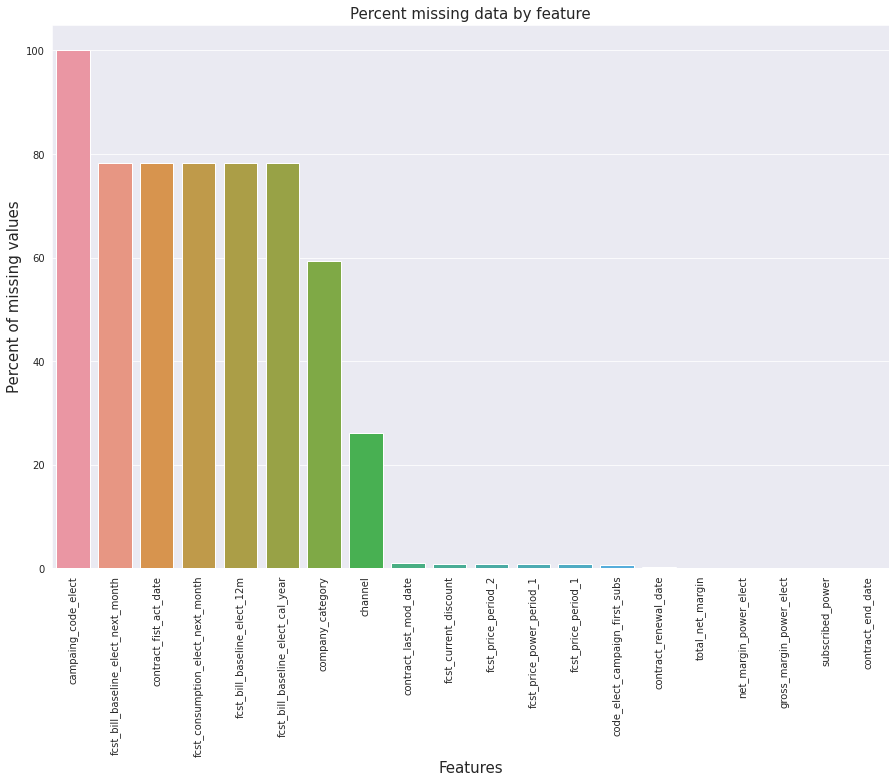

In [29]:
null_count=((train.isna().sum()/train.shape[0])*100).sort_values(ascending=False)
null_count=null_count[null_count>0]
plt.figure(figsize=(15,10))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=null_count.index, y=null_count.values)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   contract_id                          16096 non-null  object 
 1   company_category                     6551 non-null   object 
 2   campaing_code_elect                  0 non-null      float64
 3   channel                              11878 non-null  object 
 4   elect_cons_at_12m                    16096 non-null  int64  
 5   gas_cons_at_12m                      16096 non-null  int64  
 6   elect_cons_last_month                16096 non-null  int64  
 7   contract_activation_date             16096 non-null  object 
 8   contract_end_date                    16094 non-null  object 
 9   contract_fist_act_date               3508 non-null   object 
 10  contract_last_mod_date               15939 non-null  object 
 11  contract_renewal_date       

There are lots of them with null values and if we look at them in the data, most of them are categorical.

We are going to check how relevant are the null values for all the columns with more than 50% null values. This way we can determine if we can drop them.

In [31]:
def check_null_values_by_feature_name(feature_name):
  feature = train[['contract_id', 'has_churned_over_next_3m', feature_name]]
  feature_null = feature[feature.isna().any(axis=1)].index.values.tolist()
  null_values = feature.iloc[feature_null,:]
  non_null_values = feature.iloc[feature.index.difference(feature_null),:]

  figure, axis = plt.subplots(1, 2)

  axis[0].pie(pd.value_counts(null_values['has_churned_over_next_3m']), autopct='%1.1f%%')
  axis[0].set_title("null_values")

  axis[1].pie(pd.value_counts(non_null_values['has_churned_over_next_3m']), autopct='%1.1f%%')
  axis[1].set_title("non_null_values")

  figure.suptitle(feature_name)
  plt.show
  


Global churn distribution


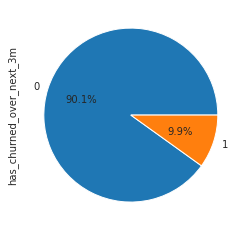

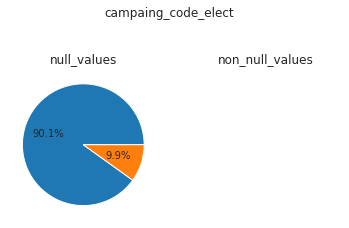

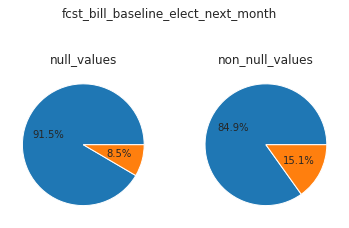

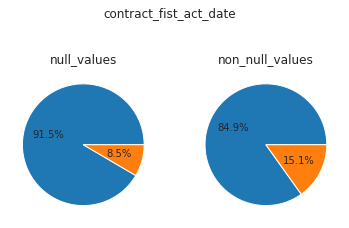

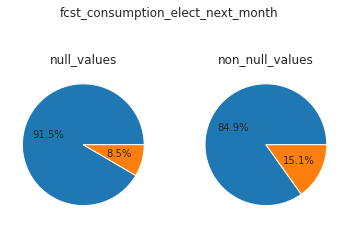

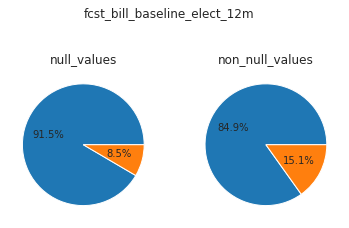

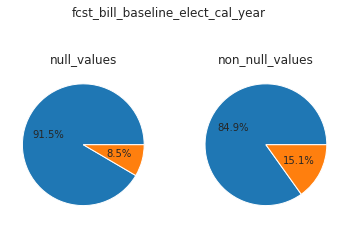

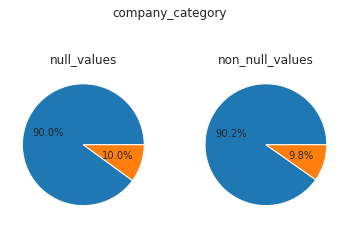

In [32]:
print("Global churn distribution")
global_churn_distribution = pd.value_counts(train['has_churned_over_next_3m']).plot.pie(autopct='%1.1f%%')

for i, feature_name_with_nulls in enumerate(null_count.index):
  check_null_values_by_feature_name(feature_name_with_nulls)
  if i == 6:
        break

First of all "campaing_code_elect" its all empty, so lets drop it

In [33]:
train.drop(['campaing_code_elect'], axis=1, inplace=True)

Seems like we should't drop: "fcst_bill_baseline_elect_next_month", "contract_fist_act_date", "fcst_consumption_elect_next_month", "fcst_consumption_elect_12m" and "fcst_consumption_elect_cal_year"; since when they don't have null values, the churn is visibly higher (5% more).

Although, since the difference is not THAT high, we will scrap all of them off (the 7 with more tha 50% null values) for the sake of simplicity.

In [34]:
train.drop(null_count.index[1:7],axis=1,inplace=True)

Alternatively, we can fill all of them with 0s so we don't have any problem whether they are strings or not.

This might make lots of outliers, but those can be trated later.

In [35]:
# train[null_count.index[1:7]] = train[null_count.index[1:7]].fillna(0)

In [36]:
train

,contract_id,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
0,d07d473503c6bef7cf1922fab1f88f3e,lmkebamcaaclubfxadlmueccxoimlema,1577,0,0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.000000,0.000000,9.533935,0.179799,0.000000,29.744311,f,0.000000,40.484555,36.606656,1,9.790569,6,lxidpiddsbxsbosboudacockeimpuepw,13.009751,1
1,79e38c743a89ad6b950ae6136bbaeb2b,foosdfpfkusacimwkcsosbicdxkicaua,280731,0,16856,2009-11-04,2016-11-04,2009-11-04,2015-11-05,12910.745989,20467.614893,0.000000,248.193187,0.139908,0.049123,27.257522,f,1440.595633,-28.777615,-26.021090,1,872.951153,6,lxidpiddsbxsbosboudacockeimpuepw,125.190059,0
2,6f6a16ed39fd75715b1acc656c749f83,foosdfpfkusacimwkcsosbicdxkicaua,99223,189585,4783,2013-02-16,2016-02-16,2013-02-16,2015-02-18,622.245387,0.000000,0.000000,81.197343,0.151782,0.053042,27.257522,t,0.000000,61.939503,56.006496,2,55.939033,3,lxidpiddsbxsbosboudacockeimpuepw,19.949036,0
3,1d8e17bf13218e671e968871e0c6373f,foosdfpfkusacimwkcsosbicdxkicaua,10381,0,0,2012-01-25,2017-01-25,2015-12-16,2016-01-26,525.026971,0.000000,0.000000,89.052476,0.151063,0.052747,27.257522,f,0.000000,94.215208,85.190604,2,53.813449,4,lxidpiddsbxsbosboudacockeimpuepw,30.356086,0
4,2c195164c61eeb0edee79688790f3dda,foosdfpfkusacimwkcsosbicdxkicaua,6107,0,0,2011-11-12,2016-11-12,2015-09-20,2015-11-13,156.718305,0.000000,0.000000,12.829360,0.180165,0.000000,31.082797,f,0.000000,43.562873,39.390111,1,11.044119,4,lxidpiddsbxsbosboudacockeimpuepw,17.338823,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,b4c9d3087133ee1619884ea047b57fe5,lmkebamcaaclubfxadlmueccxoimlema,729575,0,33991,2013-01-31,2016-05-14,2015-05-14,NaN,10110.556884,12589.095813,15.460479,281.852121,0.138080,0.047752,27.257522,f,884.608104,-10.167780,-9.193837,1,-1954.997357,3,lxidpiddsbxsbosboudacockeimpuepw,128.945761,0
16092,d997a45fc29f1c98891bcce4e25ba400,foosdfpfkusacimwkcsosbicdxkicaua,6061,0,699,2011-08-09,2016-09-05,2015-08-27,2015-09-06,294.348217,850.356764,0.000000,0.000000,0.145238,0.050660,27.257522,f,63.572701,132.460985,119.772928,1,27.077663,4,lxidpiddsbxsbosboudacockeimpuepw,118.930556,0
16093,1f8e97229ae68386239e314c54e687e4,foosdfpfkusacimwkcsosbicdxkicaua,17013,0,1107,2013-05-07,2016-05-07,2013-05-07,2015-05-14,1213.934637,1344.581208,0.000000,13.036619,0.180087,0.000000,29.744311,f,148.333993,35.680512,32.262778,1,81.099211,3,lxidpiddsbxsbosboudacockeimpuepw,17.351342,0
16094,b8b7039f339d0909d1216f4a9a07dd1c,foosdfpfkusacimwkcsosbicdxkicaua,46471,0,1949,2009-10-13,2016-10-13,2009-10-13,2015-10-14,423.961457,0.000000,0.000000,11.889784,0.184536,0.000000,30.748175,f,0.000000,35.820435,32.389299,1,33.969709,6,lxidpiddsbxsbosboudacockeimpuepw,16.525088,0


# **Step 7:** Fill nan/null values

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   contract_id                      16096 non-null  object 
 1   channel                          11878 non-null  object 
 2   elect_cons_at_12m                16096 non-null  int64  
 3   gas_cons_at_12m                  16096 non-null  int64  
 4   elect_cons_last_month            16096 non-null  int64  
 5   contract_activation_date         16096 non-null  object 
 6   contract_end_date                16094 non-null  object 
 7   contract_last_mod_date           15939 non-null  object 
 8   contract_renewal_date            16056 non-null  object 
 9   fcst_consumption_elect_12m       16096 non-null  float64
 10  fcst_consumption_elect_cal_year  16096 non-null  float64
 11  fcst_current_discount            15970 non-null  float64
 12  fcst_bill_meter_re

Lets check values with nan to see what to do with them

In [38]:
# Check data with null values on any of the other columns
train_na = train[train.isna().any(axis=1)].index.values.tolist()

# Get the na values data
na_values = train.iloc[train_na,:]

na_values

,contract_id,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m
5,628e0960516c0dbdae10ef66596a79c9,NaN,9285,0,508,2010-08-20,2016-08-20,2015-07-11,2015-08-21,463.167906,617.780555,0.000000,95.961124,0.145238,0.050660,27.257522,f,46.858719,40.484555,36.606656,1,48.165043,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,28.918904,0
10,baed9a422af46b31b6624c43397870b4,NaN,17160,0,2986,2009-12-15,2016-12-15,2015-11-02,2015-12-16,945.113043,3625.826758,0.000000,11.537443,0.205169,0.043087,29.744311,f,303.303707,5.534755,5.004597,1,51.534268,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,16.525088,0
13,143e937b3d1c80e0d012f0409598c438,NaN,2521,0,0,2010-06-11,2016-06-11,2010-06-11,2015-06-23,81.920546,0.000000,0.000000,10.970933,0.183733,0.000000,29.744311,f,0.000000,26.305632,23.785891,1,7.194285,6,ldkssxwpmemidmecebumciepifcamkci,13.009751,0
16,485804aeb7702caf103218d3f3c6ce59,NaN,45857,0,1948,2004-12-07,2016-07-10,2013-07-10,2015-07-12,641.322465,830.369746,0.000000,90.772729,0.142310,0.049471,27.257522,f,60.393373,27.285097,24.671536,1,60.086152,11,ldkssxwpmemidmecebumciepifcamkci,20.656360,0
23,6e2e3165732936b07998e97a96d3250a,NaN,23706,0,0,2010-10-08,2016-10-08,2010-10-08,2015-10-12,1693.854390,0.000000,0.000000,11.295640,0.180524,0.000000,29.744311,f,0.000000,10.758568,9.728036,2,118.230045,5,ldkssxwpmemidmecebumciepifcamkci,13.009751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,573515da33575a7c3881883098333c4d,NaN,14929,0,0,2007-05-19,2016-03-26,2007-05-19,2015-03-29,0.000000,0.000000,0.000000,0.000000,0.000757,0.000000,0.000000,f,0.000000,42.427938,38.363887,1,74.534178,9,lxidpiddsbxsbosboudacockeimpuepw,16.525088,0
16086,55a35fc78d246983124b3784db9fbc6a,NaN,40009,0,2864,2009-08-18,2017-01-26,2013-12-12,2015-12-14,1839.461372,3478.649626,0.000000,30.708941,0.208083,0.044274,29.744311,f,336.253732,46.268062,41.836178,1,93.535612,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,16.525088,0
16088,8f0f24bbd566fec5d508a02257b0583e,NaN,10606,0,1024,2012-01-02,2017-01-13,2015-11-18,2016-01-14,746.223761,1243.737618,0.000000,6.680663,0.182354,0.000000,30.413554,f,136.004574,51.118746,46.222229,1,61.255471,4,lxidpiddsbxsbosboudacockeimpuepw,16.462493,0
16089,81c0747391ee7f1f14a7db1b2c0bfa85,NaN,161728,0,28856,2005-07-21,2016-07-21,2015-07-16,2015-07-24,7062.886261,35037.242486,NaN,271.344067,NaN,NaN,NaN,f,2413.428350,-23.258408,-21.030552,1,331.130337,11,ldkssxwpmemidmecebumciepifcamkci,146.472369,0


In [39]:
print("NaN values count by feature:")

for col in train.columns:
  print("- "+col+": "+str(train[col].isna().sum()))

NaN values count by feature:
- contract_id: 0
- channel: 4218
- elect_cons_at_12m: 0
- gas_cons_at_12m: 0
- elect_cons_last_month: 0
- contract_activation_date: 0
- contract_end_date: 2
- contract_last_mod_date: 157
- contract_renewal_date: 40
- fcst_consumption_elect_12m: 0
- fcst_consumption_elect_cal_year: 0
- fcst_current_discount: 126
- fcst_bill_meter_rent_12m: 0
- fcst_price_period_1: 126
- fcst_price_period_2: 126
- fcst_price_power_period_1: 126
- client_got_gas: 0
- current_paid_consumption: 0
- gross_margin_power_elect: 13
- net_margin_power_elect: 13
- number_active_products: 0
- total_net_margin: 15
- customer_antiquity_in_years: 0
- code_elect_campaign_first_subs: 87
- subscribed_power: 3
- has_churned_over_next_3m: 0


Lets get a correlation matrix of the numeric data since it might be helpful to fill naN values

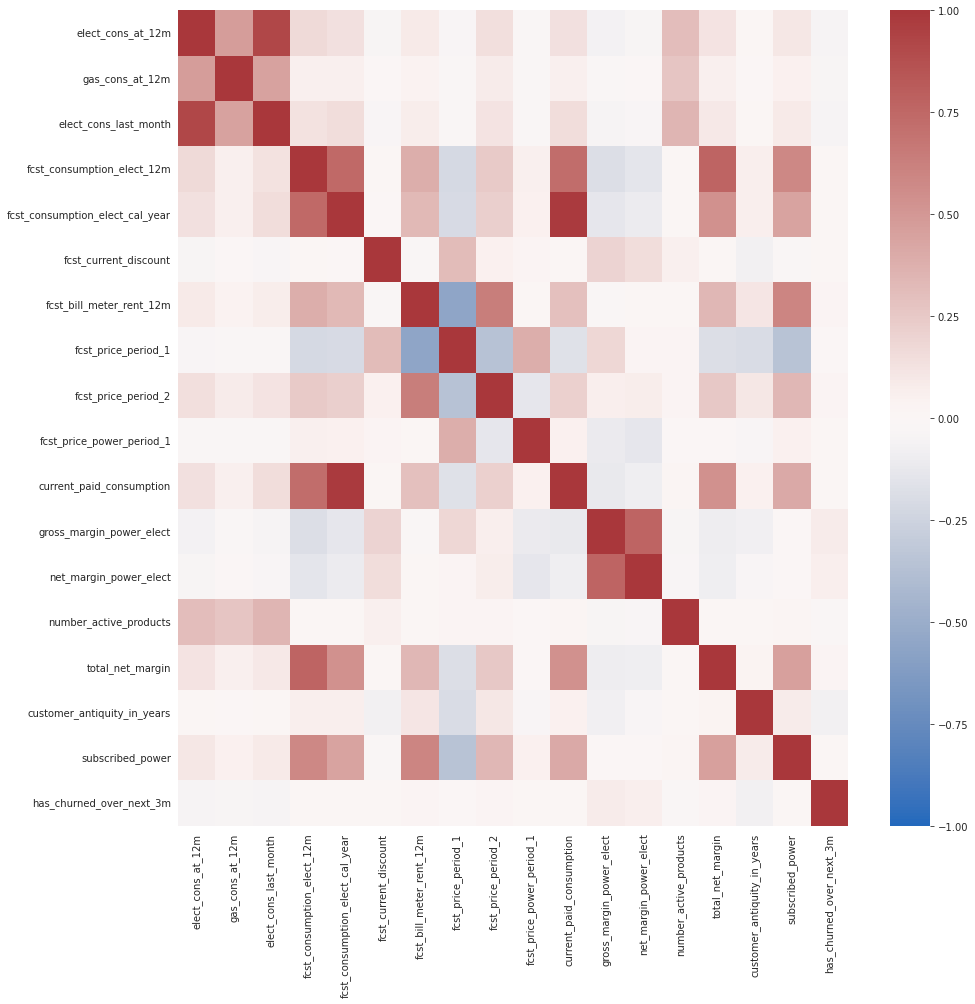

In [40]:
corr_matrix = train.corr()

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr_matrix, cmap="vlag", vmin=-1,vmax=1,center=0)
plt.show()

contract_renewal_date = contract_end_date - 1y + 1d

In [41]:
train['contract_renewal_date'] = train['contract_renewal_date'].fillna((pd.to_datetime(train['contract_end_date'])-pd.DateOffset(years=1)+pd.DateOffset(days=1)).astype(str))
train['contract_end_date'] = train['contract_end_date'].fillna((pd.to_datetime(train['contract_renewal_date'])+pd.DateOffset(years=1)-pd.DateOffset(days=1)).astype(str))


contract_end_date: *we add 3 years to the rest*

In [42]:
train['contract_end_date'] = train['contract_end_date'].fillna((pd.to_datetime(train['contract_activation_date'])+pd.DateOffset(years=3)).astype(str))

contract_last_mod_date = contract_activation_date

In [43]:
train['contract_last_mod_date'].fillna(train['contract_activation_date'],inplace=True)

Fill with 0:

*   fcst_current_discount
*   fcst_price_period_1
*   fcst_price_period_2
*   fcst_price_power_period_1
*   channel


In [44]:
train['fcst_current_discount'].fillna(0,inplace=True)
train['fcst_price_period_1'].fillna(0,inplace=True)
train['fcst_price_period_2'].fillna(0,inplace=True)
train['fcst_price_power_period_1'].fillna(0,inplace=True)

Fill with "empty":
*   channel
*   code_elect_campaign_first_subs



In [45]:
train['channel'].fillna("empty",inplace=True)
train['code_elect_campaign_first_subs'].fillna("empty",inplace=True)

Fill with mean():

*   gross_margin_power_elect
*   net_margin_power_elect
*   total_net_margin
*   subscribed_power


In [46]:
train['gross_margin_power_elect'].fillna(train['gross_margin_power_elect'].mean(),inplace=True)
train['net_margin_power_elect'].fillna(train['net_margin_power_elect'].mean(),inplace=True)
train['total_net_margin'].fillna(train['total_net_margin'].mean(),inplace=True)
train['subscribed_power'].fillna(train['subscribed_power'].mean(),inplace=True)

For the rest, replace the missing values with the most frequent values present in each column:

In [47]:
train = train.fillna(train.mode().iloc[0])

In [48]:
train.isna().values.any()

False

No more NaN values

# **Step 8:** Label Encode Binary data

In [49]:
def encode_binary(df):
  #Create a label encoder object
  le = LabelEncoder()
  # Label Encoding will be used for columns with 2 or less unique values
  le_count = 0
  le_cols = []
  for col in df.columns[1:]:
      if df[col].dtype == 'object':
          if len(list(df[col].unique())) <= 2:
              le.fit(df[col])
              df[col] = le.transform(df[col])
              le_count += 1
              le_cols.append(col)
  print(str(le_count)+" columns were label encoded: "+str(le_cols))

encode_binary(train)

1 columns were label encoded: ['client_got_gas']


# **Step 9:** Label Encode Dates

In [50]:
def encode_dates(df):
  date_cols = [col for col in df.columns if 'date' in col]
  le_count = 0
  le_cols = []
  for col in date_cols:
    df[col] = pd.to_datetime(df[col]).astype('int64') // 10**9
    le_count += 1
    le_cols.append(col)
  print(str(le_count)+" columns were label encoded: "+str(le_cols))

encode_dates(train)


4 columns were label encoded: ['contract_activation_date', 'contract_end_date', 'contract_last_mod_date', 'contract_renewal_date']


# **Step 10:** Exploratory Data Analysis (EDA)

It won't be super exahustive, since it kind of has already been done a bit and because we want to check the discount hypothesis at the end. also due to time constraints, we can't explore that much.

In [51]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
elect_cons_at_12m,16096.0,2.287598e+05,7.979617e+05,-1.471120e+05,6.934750e+03,1.800350e+04,5.897475e+04,1.890300e+07
gas_cons_at_12m,16096.0,1.631417e+04,9.078917e+04,-1.552000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.141273e+06
elect_cons_last_month,16096.0,1.456158e+04,6.162381e+04,-6.837900e+04,0.000000e+00,6.730000e+02,3.087000e+03,3.396121e+06
contract_activation_date,16096.0,1.295255e+09,5.291456e+07,9.644832e+08,1.263254e+09,1.299197e+09,1.335398e+09,1.409530e+09
contract_end_date,16096.0,1.468291e+09,1.195735e+08,-9.223372e+09,1.461802e+09,1.469837e+09,1.477872e+09,1.497312e+09
contract_last_mod_date,16096.0,1.355628e+09,8.018342e+07,9.644832e+08,1.282262e+09,1.370218e+09,1.432426e+09,1.454026e+09
contract_renewal_date,16096.0,1.436078e+09,1.193003e+08,-9.223372e+09,1.429402e+09,1.437696e+09,1.446077e+09,1.453939e+09
fcst_consumption_elect_12m,16096.0,1.341141e+03,2.282848e+03,-9.441943e+03,2.903597e+02,6.671093e+02,1.523042e+03,5.872590e+04
fcst_consumption_elect_cal_year,16096.0,1.732827e+03,4.776320e+03,-7.779220e+04,0.000000e+00,3.434133e+02,1.811778e+03,1.593283e+05
fcst_current_discount,16096.0,5.069928e-01,2.649653e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.576746e+01


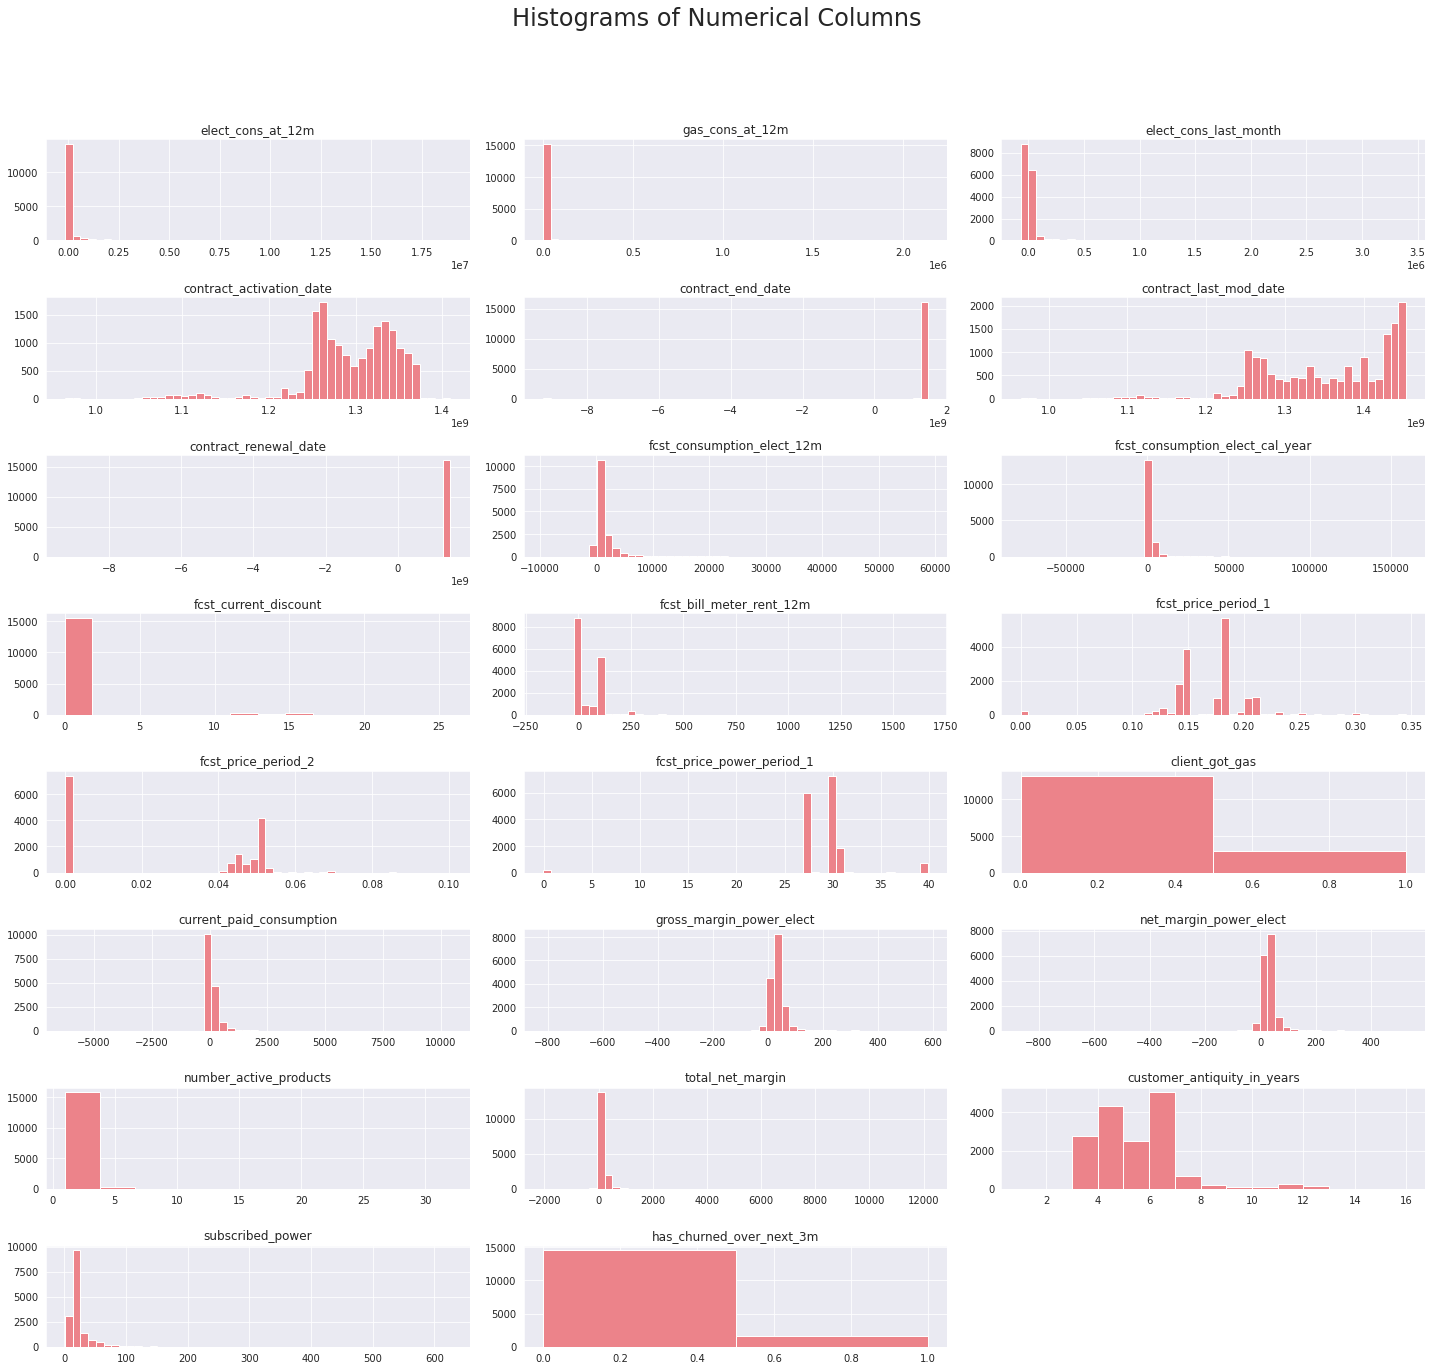

In [52]:
#Histogram:

def plot_numeric_histograms(numeric_df):
  fig = plt.figure(figsize=(20, 20))
  plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
  for i in range(numeric_df.shape[1]):
      plt.subplot(math.ceil(numeric_df.shape[1]/3), 3, i + 1)
      f = plt.gca()
      f.set_title(numeric_df.columns.values[i])
      vals = np.size(numeric_df.iloc[:, i].unique())
      if vals >= 50:
          vals = 50
          
      plt.hist(numeric_df.iloc[:, i], bins=vals, color = '#ec838a')
      plt.tight_layout(rect=[0, 0.03, 1, 0.95])

  plt.show()

train_numeric = train._get_numeric_data()
plot_numeric_histograms(train_numeric)

Most of them seem to have outliers that don't let us visualize the data propperly, so lets treat them so we can work with the graphs more easily

First lets try to visualize for one example without outliers, we will clean them with the Z-score or the Quartiles, here is an example

With Z-score as the limitant:
16096
12524


/tmp/ipykernel_245767/2899113176.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


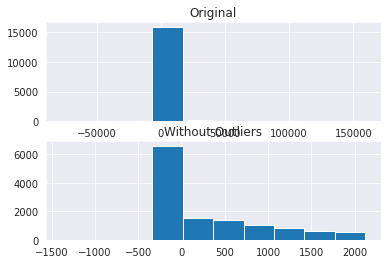

With Quartiles as the limitant:
16096
14492


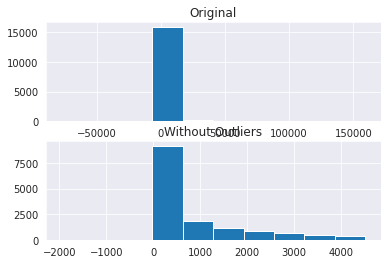

In [53]:
def is_z_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return abs(modified_z_score) > thresh

def is_Q_outlier(points, thresh=3.5):
    Q1=points.quantile(0.25)
    Q3=points.quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR

    return (Lower_Whisker > points) | (points > Upper_Whisker)

x = train["fcst_consumption_elect_cal_year"]

# With Z-score as the limitant
print("With Z-score as the limitant:")

z_filtered = x[~is_z_outlier(x)]
print(x.count())
print(z_filtered.count())

# Plot the results
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.hist(x)
ax1.set_title('Original')

ax2.hist(z_filtered)
ax2.set_title('Without Outliers')

plt.show()


# With Quartiles as the limitant
print("With Quartiles as the limitant:")

Q_filtered = x[~is_Q_outlier(x)]
print(x.count())
print(Q_filtered.count())

# Plot the results
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.hist(x)
ax1.set_title('Original')

ax2.hist(Q_filtered)
ax2.set_title('Without Outliers')

plt.show()

I personlly prefer the Quartiles' Whiskers as limitant for the outliers, as they are more visual using box plots.

Now, lets remake the earlier method "plot_numeric_histograms" with the outliers filtered:

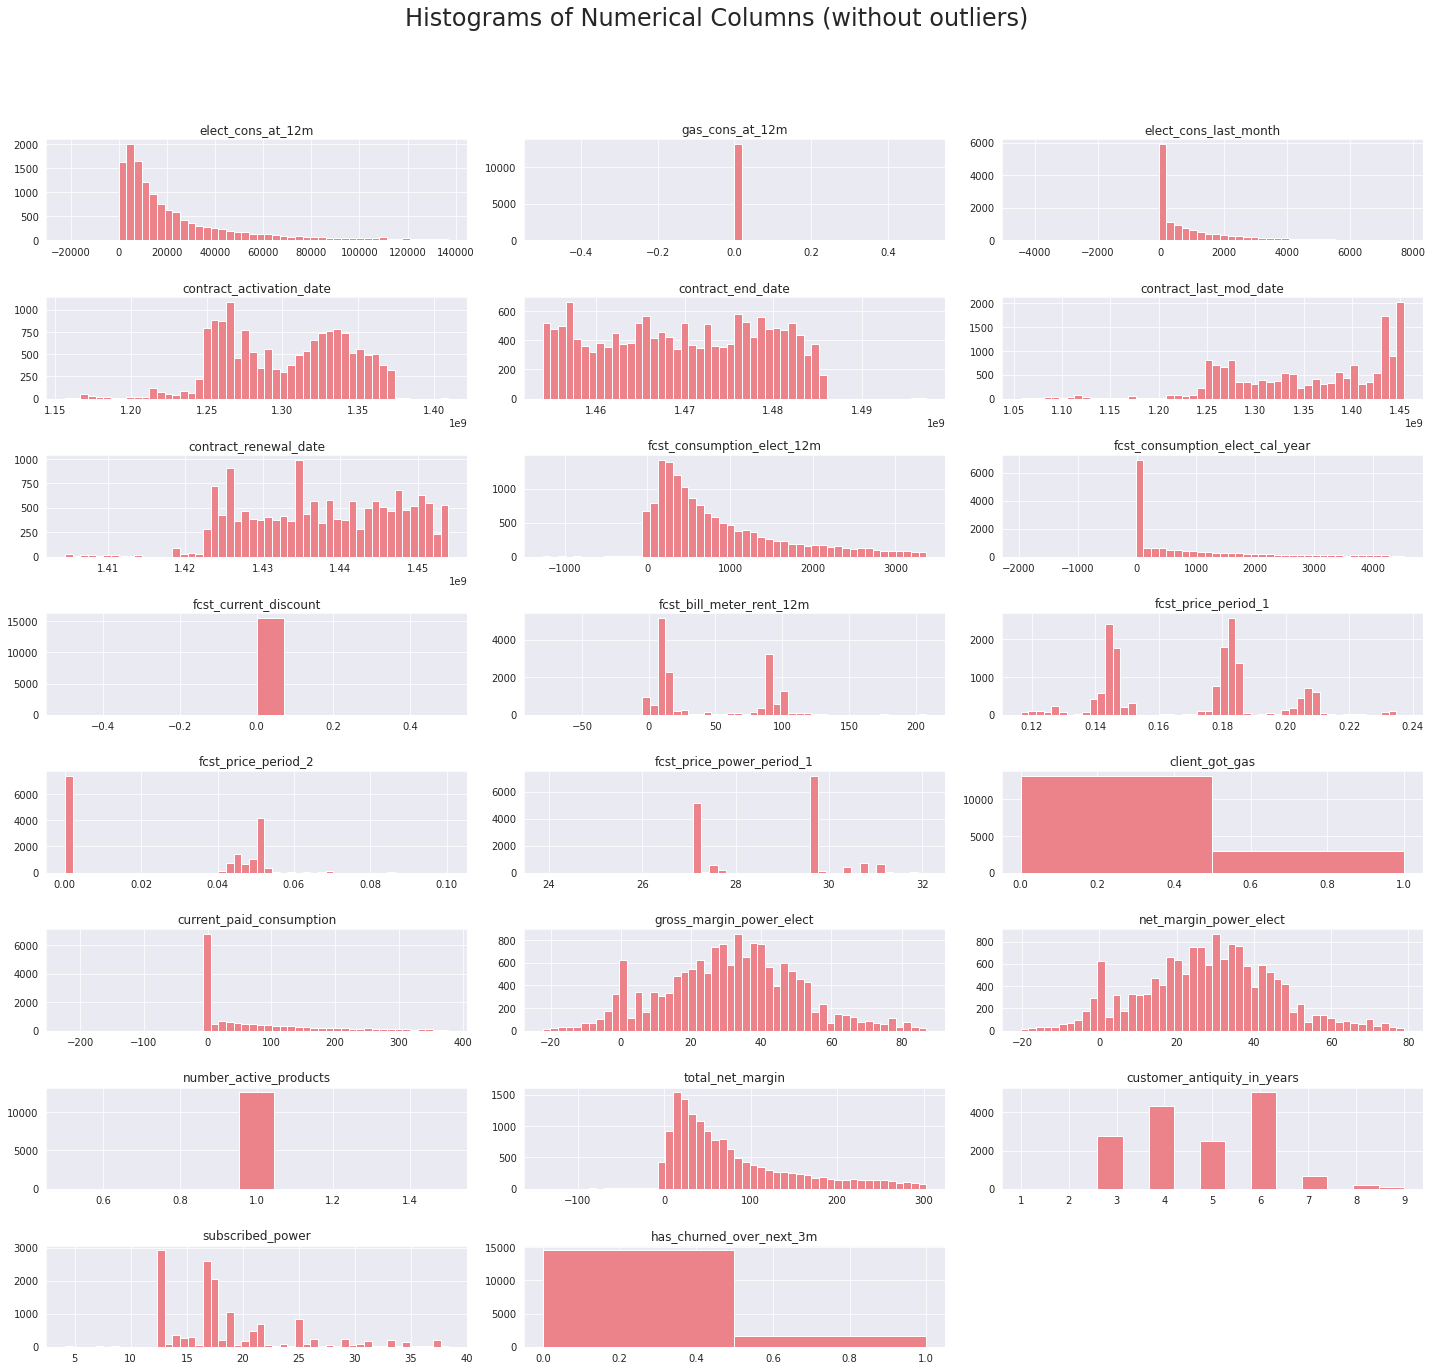

In [54]:
# Histogram without outliers:

def plot_numeric_histograms(numeric_df, with_outliers=False):
  fig = plt.figure(figsize=(20, 20))
  if with_outliers:
    plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
  else:
    plt.suptitle('Histograms of Numerical Columns (without outliers)\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
  for i in range(numeric_df.shape[1]):
      plt.subplot(math.ceil(numeric_df.shape[1]/3), 3, i + 1)
      f = plt.gca()
      f.set_title(numeric_df.columns.values[i])
      histogram_data = numeric_df.iloc[:, i]
      vals = np.size(histogram_data.unique())
      if vals > 2:
        if not with_outliers:
          histogram_data = histogram_data[~is_Q_outlier(histogram_data)]
          # histogram_data = histogram_data[~is_z_outlier(histogram_data)]
      if vals >= 50:
          vals = 50
          
      plt.hist(histogram_data, bins=vals, color = '#ec838a')
      plt.tight_layout(rect=[0, 0.03, 1, 0.95])

  plt.show()

train_numeric = train._get_numeric_data()
plot_numeric_histograms(train_numeric)

From these cleaned histograms we can learn and confirm multiple things:

*   "client_got_gas" and "has_churned_over_next_3m": are binary
*   "elect_cons_at_12m", "gas_cons_at_12m", "elect_cons_last_month", "fcst_consumption_elect_12m", "fcst_consumption_elect_cal_year", "current_paid_consumption" and "total_net_margin": look like Exponential distributions
*   "gas_cons_at_12m" and "fcst_current_discount": the great mayority of people don't consume gas and/or don't have any type of discount
*   "gross_margin_power_elect" and "net_margin_power_elect": look like Gaussian distributions
*   "fcst_price_period_2" and "current_paid_consumption": could be a Gaussian distribution without the 0
*   "contract_last_mod_date": seems to be incrising over time, which makes sense, since contracts are updated over time too



Lets try to make the exponential distributions into Gaussian distributions applying logs

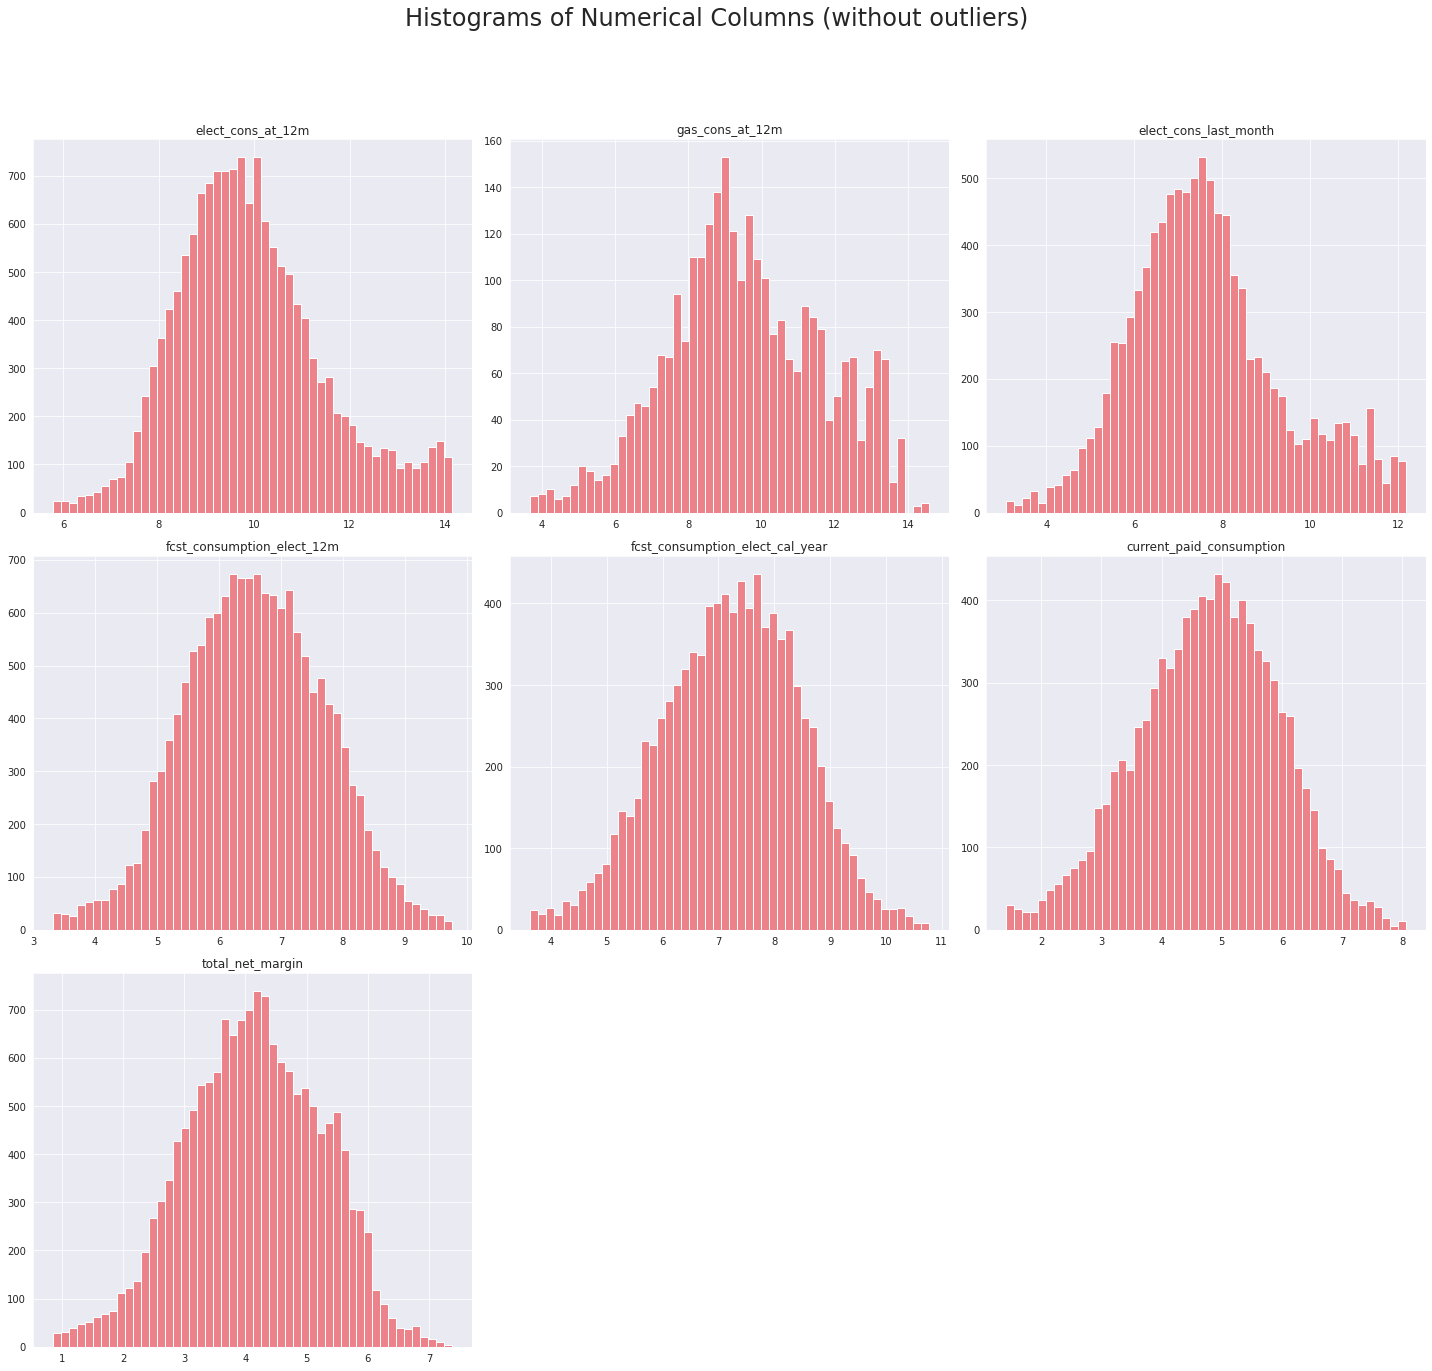

In [55]:
train_exponential = train[["elect_cons_at_12m",
                          "gas_cons_at_12m",
                          "elect_cons_last_month",
                          "fcst_consumption_elect_12m",
                          "fcst_consumption_elect_cal_year",
                          "current_paid_consumption",
                          "total_net_margin"
                          ]]
# Clean values <= 0
train_exponential = train_exponential[~(train_exponential<=0)]

# Apply log
train_exponential = np.log(train_exponential)

#Plot
plot_numeric_histograms(train_exponential)

Those look much better in case we want to do a further analysis on them

Lets check our categorical data now

In [56]:
cols = train.columns

num_cols = train._get_numeric_data().columns

cat_cols = list(set(cols) - set(num_cols))

cat_cols

['channel', 'code_elect_campaign_first_subs', 'contract_id']

channel


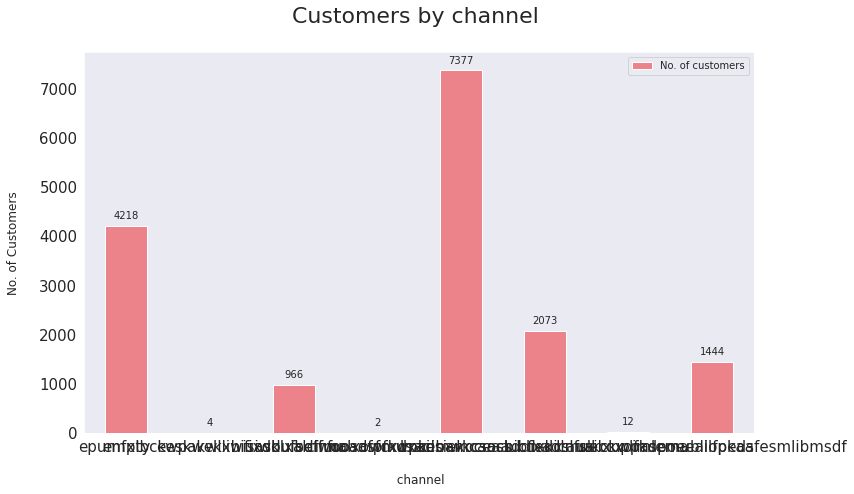

code_elect_campaign_first_subs


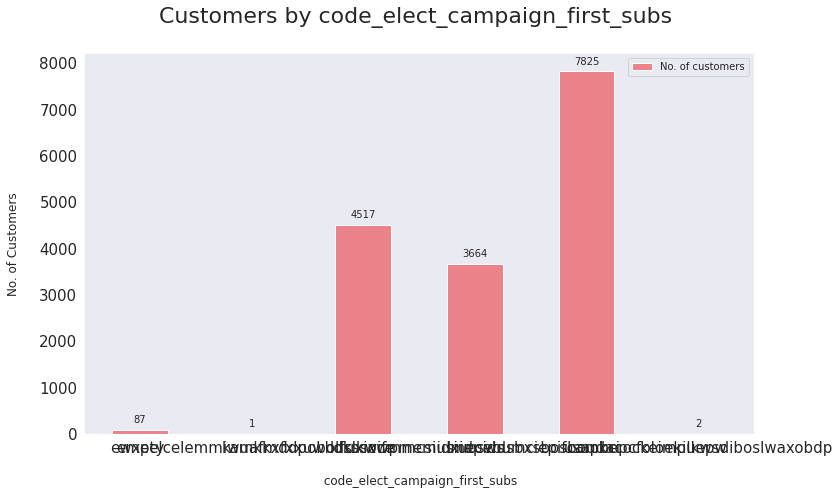

In [57]:
def add_value_labels(ax, spacing=5):   
  for rect in ax.patches:      
      y_value = rect.get_height()
      x_value = rect.get_x() + rect.get_width() / 2       
      space = spacing        
      va = 'bottom'      
      if y_value < 0:           
          space *= -1            
          va = 'top'       
      label = "{:.0f}".format(y_value)      
      
      ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va)

def plot_categoric_data(cat_df):
  cat_cols = cat_df.columns

  for col in cat_cols:
    if col != "contract_id":
      print(col)
      split = train[[ "contract_id", col]]
      sectors = split .groupby(col)
      split = pd.DataFrame(sectors["contract_id"].count())
      split.rename(columns={'contract_id':'No. of customers'}, inplace=True)
      ax =  split[["No. of customers"]].plot.bar(title = 'Customers by '+col,legend =True, table = False, 
      grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
      fontsize = 15, stacked=False)
      plt.ylabel('No. of Customers\n',
      horizontalalignment="center",fontstyle = "normal", 
      fontsize = "large", fontfamily = "sans-serif")
      plt.xlabel('\n '+col,
      horizontalalignment="center",fontstyle = "normal", 
      fontsize = "large", fontfamily = "sans-serif")
      plt.title('Customers by '+col+' \n',
      horizontalalignment="center",fontstyle = "normal", 
      fontsize = "22", fontfamily = "sans-serif")
      plt.legend(loc='upper right', fontsize = "medium")
      plt.xticks(rotation=0, horizontalalignment="center")
      plt.yticks(rotation=0, horizontalalignment="right")
      x_labels = np.array(split[["No. of customers"]])

      add_value_labels(ax)
      
      plt.show()

train_categoric = train[cat_cols]

#Plot
plot_categoric_data(train_categoric)


# **Step 11:** Join with hist data

We bring back "train_hist_unique" (or "train_hist_simple_unique") generated earlier

In [58]:
# train = pd.merge(train, train_hist_unique, on="contract_id") # It got better results without merging with "train_hist_unique"
# train = pd.merge(train, train_hist_simple_unique, on="contract_id") # The results were kind of similar when merging with "train_hist_simple_unique"

# **Step 12:** Treat outliers

First, lets take another look to the data info

In [59]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
elect_cons_at_12m,16096.0,2.287598e+05,7.979617e+05,-1.471120e+05,6.934750e+03,1.800350e+04,5.897475e+04,1.890300e+07
gas_cons_at_12m,16096.0,1.631417e+04,9.078917e+04,-1.552000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.141273e+06
elect_cons_last_month,16096.0,1.456158e+04,6.162381e+04,-6.837900e+04,0.000000e+00,6.730000e+02,3.087000e+03,3.396121e+06
contract_activation_date,16096.0,1.295255e+09,5.291456e+07,9.644832e+08,1.263254e+09,1.299197e+09,1.335398e+09,1.409530e+09
contract_end_date,16096.0,1.468291e+09,1.195735e+08,-9.223372e+09,1.461802e+09,1.469837e+09,1.477872e+09,1.497312e+09
contract_last_mod_date,16096.0,1.355628e+09,8.018342e+07,9.644832e+08,1.282262e+09,1.370218e+09,1.432426e+09,1.454026e+09
contract_renewal_date,16096.0,1.436078e+09,1.193003e+08,-9.223372e+09,1.429402e+09,1.437696e+09,1.446077e+09,1.453939e+09
fcst_consumption_elect_12m,16096.0,1.341141e+03,2.282848e+03,-9.441943e+03,2.903597e+02,6.671093e+02,1.523042e+03,5.872590e+04
fcst_consumption_elect_cal_year,16096.0,1.732827e+03,4.776320e+03,-7.779220e+04,0.000000e+00,3.434133e+02,1.811778e+03,1.593283e+05
fcst_current_discount,16096.0,5.069928e-01,2.649653e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.576746e+01


Lets start by doing a logarithmic transformation to our Exponential data to minimize the outliers. also, we will fill the NaN values with the median.

In [60]:
train_exponential = train[["elect_cons_at_12m",
                          "gas_cons_at_12m",
                          "elect_cons_last_month",
                          "fcst_consumption_elect_12m",
                          "fcst_consumption_elect_cal_year",
                          "current_paid_consumption",
                          "total_net_margin"
                          ]]
train_exponential.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   elect_cons_at_12m                16096 non-null  int64  
 1   gas_cons_at_12m                  16096 non-null  int64  
 2   elect_cons_last_month            16096 non-null  int64  
 3   fcst_consumption_elect_12m       16096 non-null  float64
 4   fcst_consumption_elect_cal_year  16096 non-null  float64
 5   current_paid_consumption         16096 non-null  float64
 6   total_net_margin                 16096 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.5 MB


In [61]:
train_exponential = train[["elect_cons_at_12m",
                          # "gas_cons_at_12m", # only 2920 > 0 (out of 16096)
                          # "elect_cons_last_month", # only 10808 > 0 (out of 16096)
                          "fcst_consumption_elect_12m",
                          # "fcst_consumption_elect_cal_year", # only 9573 > 0 (out of 16096)
                          # "current_paid_consumption", # only 9548 > 0 (out of 16096)
                          "total_net_margin"
                          ]]
# Clean values <= 0 by replacing it with 1
train_exponential = train_exponential[~(train_exponential<=0)]

# Apply log
train_exponential = np.log(train_exponential)
train_exponential = train_exponential.fillna(train_exponential.median())
train_exponential.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   elect_cons_at_12m           16096 non-null  float64
 1   fcst_consumption_elect_12m  16096 non-null  float64
 2   total_net_margin            16096 non-null  float64
dtypes: float64(3)
memory usage: 1019.0 KB


In [62]:
train[train_exponential.columns] = train_exponential

Lets substitute the outliers with the Quartiles' Whiskers for the values of the top and of the bottom, rather than the median

In [63]:
train_numeric = train._get_numeric_data()

# Make sure that things with not so many different values (like binary data or similar)
train_numeric = train_numeric.loc[:, (train_numeric.nunique() > 10)]

Q1 = train_numeric.quantile(0.25)
Q3 = train_numeric.quantile(0.75)
IQR = Q3 - Q1

# The outliers might be relevant where Q1==Q3, so we don't clean them
train_numeric = train_numeric.loc[:, (IQR != 0)]

train_numeric = train_numeric[~((train_numeric < (Q1 - 1.5 * IQR)))].fillna(Q1 - 1.5 * IQR)
train_numeric = train_numeric[~((train_numeric > (Q3 + 1.5 * IQR)))].fillna(Q3 + 1.5 * IQR)
# train_numeric = train_numeric[~((train_numeric < (Q1 - 1.5 * IQR)))].fillna(train_numeric.median())
# train_numeric = train_numeric[~((train_numeric > (Q3 + 1.5 * IQR)))].fillna(train_numeric.median())

train_numeric.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   elect_cons_at_12m                16096 non-null  float64
 1   elect_cons_last_month            16096 non-null  float64
 2   contract_activation_date         16096 non-null  float64
 3   contract_end_date                16096 non-null  float64
 4   contract_last_mod_date           16096 non-null  float64
 5   contract_renewal_date            16096 non-null  float64
 6   fcst_consumption_elect_12m       16096 non-null  float64
 7   fcst_consumption_elect_cal_year  16096 non-null  float64
 8   fcst_bill_meter_rent_12m         16096 non-null  float64
 9   fcst_price_period_1              16096 non-null  float64
 10  fcst_price_period_2              16096 non-null  float64
 11  fcst_price_power_period_1        16096 non-null  float64
 12  current_paid_consu

/tmp/ipykernel_245767/1341707278.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train_numeric = train_numeric[~((train_numeric < (Q1 - 1.5 * IQR)))].fillna(Q1 - 1.5 * IQR)
/tmp/ipykernel_245767/1341707278.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train_numeric = train_numeric[~((train_numeric > (Q3 + 1.5 * IQR)))].fillna(Q3 + 1.5 * IQR)


In [64]:
train[train_numeric.columns] = train_numeric

In [65]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
elect_cons_at_12m,16096.0,1.007825e+01,1.788270e+00,5.721384e+00,8.879472e+00,9.819617e+00,1.098486e+01,1.414295e+01
gas_cons_at_12m,16096.0,1.631417e+04,9.078917e+04,-1.552000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.141273e+06
elect_cons_last_month,16096.0,2.086295e+03,2.813631e+03,-4.630500e+03,0.000000e+00,6.730000e+02,3.087000e+03,7.717500e+03
contract_activation_date,16096.0,1.296775e+09,4.774236e+07,1.155038e+09,1.263254e+09,1.299197e+09,1.335398e+09,1.409530e+09
contract_end_date,16096.0,1.469637e+09,9.217612e+06,1.437696e+09,1.461802e+09,1.469837e+09,1.477872e+09,1.497312e+09
contract_last_mod_date,16096.0,1.355639e+09,8.013688e+07,1.057018e+09,1.282262e+09,1.370218e+09,1.432426e+09,1.454026e+09
contract_renewal_date,16096.0,1.437490e+09,9.969686e+06,1.404389e+09,1.429402e+09,1.437696e+09,1.446077e+09,1.453939e+09
fcst_consumption_elect_12m,16096.0,6.525685e+00,1.189193e+00,3.406103e+00,5.759520e+00,6.536732e+00,7.328465e+00,9.681882e+00
fcst_consumption_elect_cal_year,16096.0,1.139603e+03,1.542549e+03,-2.717667e+03,0.000000e+00,3.434133e+02,1.811778e+03,4.529444e+03
fcst_current_discount,16096.0,5.069928e-01,2.649653e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.576746e+01


# **Step 13:** Encode Categorical data

After reviewing the data, "code_elect_campaign_first_subs" values don't match 1 to 1 between the train and the test datasets, so we can't use get_dummies() for it. We will encode it so that if it is "empty" -> 0, if not -> 1 :

In [66]:
first_campaign = train[["code_elect_campaign_first_subs"]]

first_campaign = first_campaign[~(first_campaign!="empty")].fillna(1)
first_campaign = first_campaign[~(first_campaign=="empty")].fillna(0)
first_campaign.describe().T

,count,mean,std,min,25%,50%,75%,max
code_elect_campaign_first_subs,16096.0,0.994595,0.073322,0.0,1.0,1.0,1.0,1.0


In [67]:
train[first_campaign.columns] = first_campaign

We use get_dummies()

In [68]:
#Incase if user_id is an object:
    
identity = train["contract_id"]
train = train.drop(columns="contract_id")
#Convert rest of categorical variable into dummy:
train= pd.get_dummies(train)
#Rejoin userid to dataset:
train = pd.concat([train, identity], axis = 1)

In [69]:
train

,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,has_churned_over_next_3m,channel_empty,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,contract_id
0,7.363280,0,0.0,1.262650e+09,1.481501e+09,1.446336e+09,1.450051e+09,4.729064,0.000000,0.000000,9.533935,0.179799,0.000000,29.744311,0,0.000000,40.484555,36.606656,1,2.281420,6.0,1,13.009751,1,0,0,0,0,0,1,0,0,d07d473503c6bef7cf1922fab1f88f3e
1,12.545152,0,7717.5,1.257293e+09,1.478218e+09,1.257293e+09,1.446682e+09,9.465815,4529.444383,0.000000,210.250891,0.139908,0.049123,27.257522,0,377.657722,-22.383885,-20.503382,1,6.771880,6.0,1,38.495943,0,0,0,0,0,1,0,0,0,79e38c743a89ad6b950ae6136bbaeb2b
2,11.505125,189585,4783.0,1.360973e+09,1.455581e+09,1.360973e+09,1.424218e+09,6.433335,0.000000,0.000000,81.197343,0.151782,0.053042,27.257522,1,0.000000,61.939503,56.006496,2,4.024262,3.0,1,19.949036,0,0,0,0,0,1,0,0,0,6f6a16ed39fd75715b1acc656c749f83
3,9.247732,0,0.0,1.327450e+09,1.485302e+09,1.450224e+09,1.453766e+09,6.263450,0.000000,0.000000,89.052476,0.151063,0.052747,27.257522,0,0.000000,87.160727,78.970003,2,3.985523,4.0,1,30.356086,0,0,0,0,0,1,0,0,0,1d8e17bf13218e671e968871e0c6373f
4,8.717191,0,0.0,1.321056e+09,1.478909e+09,1.442707e+09,1.447373e+09,5.054450,0.000000,0.000000,12.829360,0.180165,0.000000,31.082797,0,0.000000,43.562873,39.390111,1,2.401898,4.0,1,17.338823,0,0,0,0,0,1,0,0,0,2c195164c61eeb0edee79688790f3dda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,13.500217,0,7717.5,1.359590e+09,1.463184e+09,1.431562e+09,1.431648e+09,9.221335,4529.444383,15.460479,210.250891,0.138080,0.047752,27.257522,0,377.657722,-10.167780,-9.193837,1,4.115296,3.0,1,38.495943,0,0,0,0,0,0,1,0,0,b4c9d3087133ee1619884ea047b57fe5
16092,8.709630,0,699.0,1.312848e+09,1.473034e+09,1.440634e+09,1.441498e+09,5.684763,850.356764,0.000000,0.000000,0.145238,0.050660,27.257522,0,63.572701,87.160727,78.970003,1,3.298709,4.0,1,38.495943,0,0,0,0,0,1,0,0,0,d997a45fc29f1c98891bcce4e25ba400
16093,9.741733,0,1107.0,1.367885e+09,1.462579e+09,1.367885e+09,1.431562e+09,7.101622,1344.581208,0.000000,13.036619,0.180087,0.000000,29.744311,0,148.333993,35.680512,32.262778,1,4.395673,3.0,1,17.351342,0,0,0,0,0,1,0,0,0,1f8e97229ae68386239e314c54e687e4
16094,10.746584,0,1949.0,1.255392e+09,1.476317e+09,1.255392e+09,1.444781e+09,6.049643,0.000000,0.000000,11.889784,0.184536,0.000000,30.748175,0,0.000000,35.820435,32.389299,1,3.525469,6.0,1,16.525088,0,0,0,0,0,1,0,0,0,b8b7039f339d0909d1216f4a9a07dd1c


# **Step 14:** Generate train-test

First, we split the dataset into dependent and independent variables

In [70]:
#Identify response variable:
    
response = train["has_churned_over_next_3m"]
dataset = train.drop(columns="has_churned_over_next_3m")
response.sum()

1595

Then generate training and test datasets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    stratify=response,
                                                    test_size = 0.2, #use 0.9 if data is huge
                                                    random_state = 0
                                                    )
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
y_test.sum()

Number transactions X_train dataset:  (12876, 32)
Number transactions y_train dataset:  (12876,)
Number transactions X_test dataset:  (3220, 32)
Number transactions y_test dataset:  (3220,)


319

Remove Identifiers

In [72]:
train_identity = X_train['contract_id']
X_train = X_train.drop(columns = ['contract_id'])
test_identity = X_test['contract_id']
X_test = X_test.drop(columns = ['contract_id'])

Conduct Feature Scaling

In [73]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# **Step 15:** Modelling

We will check the following models:

*   Logistic Regression
*   SVC (not used due to taking a lot of time)
*   Kernel SVM (not used since SVM can't calculate Brier score because it doesn't have a "predict_survival_function")
*   KNN
*   Gaussian NB (not used due to very bad results)
*   Decision Tree Classifier
*   Random Forest



In [74]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced',
                                                         verbose=0, n_jobs=4)))
# models.append(('SVC', SVC(kernel = 'linear', random_state = 0, verbose=1)))
# models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0, verbose=1)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, n_jobs=4)))
# models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0, verbose=0, n_jobs=4)))
#Evaluating Model Results:
acc_results = []
roc_results = []
bri_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm',
       'Accuracy Mean', 'Accuracy STD',
       'ROC AUC Mean', 'ROC AUC STD', 
       'Brier score Mean', 'Brier score STD'
       ]
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
  kfold = model_selection.KFold(n_splits=4, random_state=None)
  # accuracy scoring:
  cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', verbose=0)
  # roc_auc scoring:
  cv_roc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc', verbose=0)
  # roc_auc scoring:
  cv_bri_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_brier_score', verbose=0)
  cv_bri_results = -cv_bri_results # So they aren't negative
  acc_results.append(cv_acc_results)
  roc_results.append(cv_roc_results)
  bri_results.append(cv_bri_results)
  names.append(name)
  model_results.loc[i] = [name,
                          round(cv_acc_results.mean(), 4),
                          round(cv_acc_results.std(), 4),
                          round(cv_roc_results.mean(), 4),
                          round(cv_roc_results.std(), 4),
                          round(cv_bri_results.mean(), 4), 
                          round(cv_bri_results.std(), 4)
                          ]
  i += 1
  
model_results.sort_values(by=['Accuracy Mean'], ascending=False)

/home/pabloroldan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/home/pabloroldan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/home/pabloroldan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/home/pabloroldan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/home/pabloroldan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any

,Algorithm,Accuracy Mean,Accuracy STD,ROC AUC Mean,ROC AUC STD,Brier score Mean,Brier score STD
3,Random Forest,0.9066,0.0057,0.6955,0.0055,0.0813,0.0041
1,KNN,0.8952,0.0049,0.6015,0.0129,0.0972,0.0045
2,Decision Tree Classifier,0.8420,0.0050,0.5691,0.0078,0.1580,0.0048
0,Logistic Regression,0.6034,0.0116,0.6404,0.0173,0.2332,0.0021


Lets compare these results:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


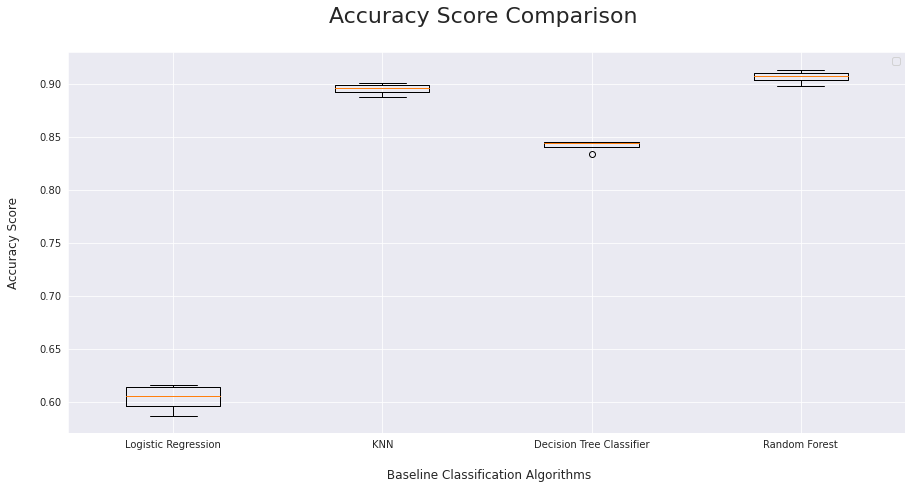

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


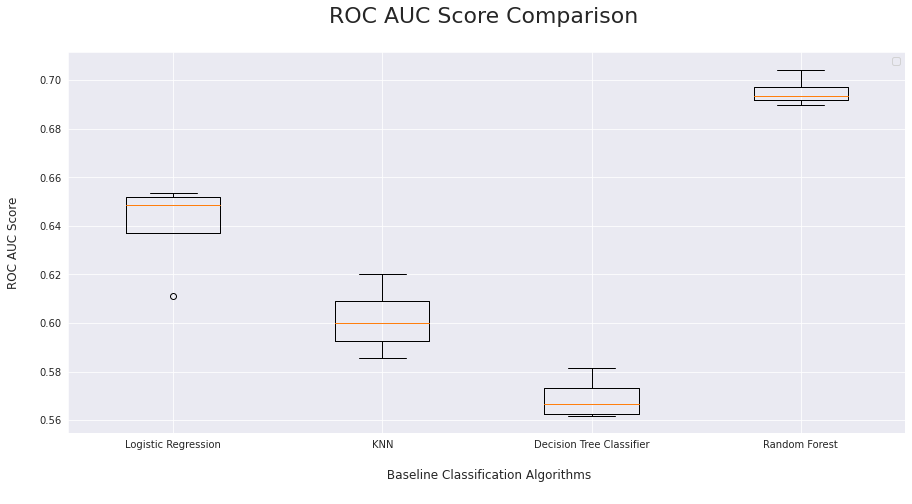

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


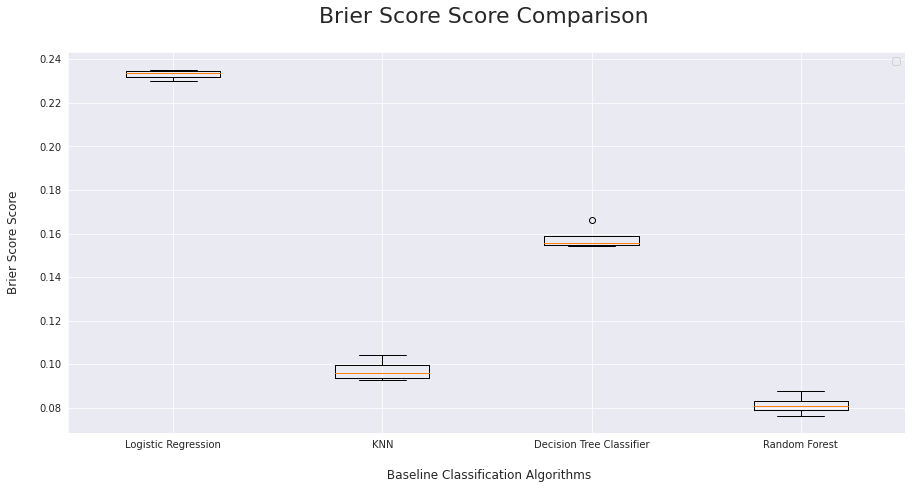

In [75]:
def plot_results(results, results_label=""):
  fig = plt.figure(figsize=(15, 7))
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.ylabel(results_label+' Score\n',
            horizontalalignment="center",fontstyle = "normal", 
            fontsize = "large", fontfamily = "sans-serif")

  plt.xlabel('\n Baseline Classification Algorithms\n',
            horizontalalignment="center",fontstyle = "normal", 
            fontsize = "large", fontfamily = "sans-serif")

  plt.title(results_label+' Score Comparison \n',
  horizontalalignment="center", fontstyle = "normal", 
  fontsize = "22", fontfamily = "sans-serif")
  plt.legend(loc='upper right', fontsize = "medium")
  plt.xticks(rotation=0, horizontalalignment="center")
  plt.yticks(rotation=0, horizontalalignment="right")
  plt.show()

plot_results(acc_results, "Accuracy")
plot_results(roc_results, "ROC AUC")
plot_results(bri_results, "Brier Score")

The Random Forest seems to be better in every metric.

Out of curiosity, let's see the Optimal Number of Trees for our Random Forest Model:

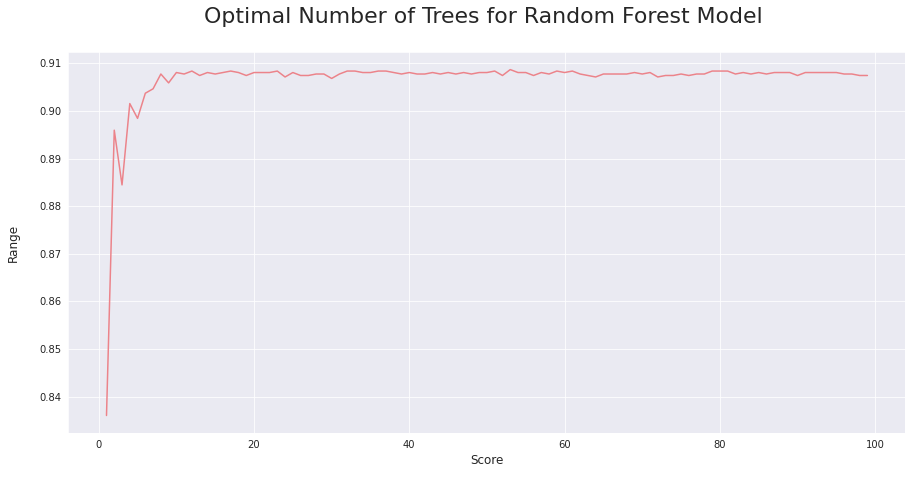

Highest accuracy score of 0.908695652173913, when its n_estimators = 53


In [76]:
def get_optimal_n_estimators():
  score_array = []
  for each in range(1,100):
      rf_loop = RandomForestClassifier(
  n_estimators = each, criterion = 'entropy', random_state = 0, verbose=0, n_jobs=4) 
      rf_loop.fit(X_train,y_train)
      score_array.append(rf_loop.score(X_test,y_test))
  
  fig = plt.figure(figsize=(15, 7))
  plt.plot(range(1,100),score_array, color = '#ec838a')
  plt.ylabel('Range\n',horizontalalignment="center",
  fontstyle = "normal", fontsize = "large", 
  fontfamily = "sans-serif")
  plt.xlabel('Score\n',horizontalalignment="center",
  fontstyle = "normal", fontsize = "large", 
  fontfamily = "sans-serif")
  plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
  #plt.legend(loc='top right', fontsize = "medium")
  plt.xticks(rotation=0, horizontalalignment="center")
  plt.yticks(rotation=0, horizontalalignment="right")
  plt.show()
  print("Highest accuracy score of "+str(np.max(score_array))+", when its n_estimators = "+str(np.argmax(score_array)+1))

get_optimal_n_estimators()

Let's compare Baseline Classification Algorithms

In [77]:
# Lets put the threshold at 0.4 instead of 0.5 (on the predict_proba)
threshold = 0.4

def get_model_results(model):
  classifier_label = model[0]
  classifier = model[1]
  # Fitting classifier to the Training set:
  classifier.fit(X_train, y_train)
  # Predicting the Test set results predict_proba
  y_pred_proba = classifier.predict_proba(X_test)[:, 1]
  y_pred = (y_pred_proba >= threshold).astype('int') # Lets put the threshold at 0.4 instead of 0.5
  # y_pred = classifier.predict(X_test)

  #Evaluate results
  acc = accuracy_score(y_test, y_pred )
  prec = precision_score(y_test, y_pred )
  rec = recall_score(y_test, y_pred )
  f1 = f1_score(y_test, y_pred )
  f2 = fbeta_score(y_test, y_pred, beta=2.0)
  model_results = pd.DataFrame([[
      classifier_label, acc, prec, rec, f1, f2]],
      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
  prediction = pd.DataFrame([[
      classifier_label, y_pred, y_pred_proba]],
      columns = ['Model', 'Prediction', 'Prediction Probability'])
  return model_results, prediction

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
predictions = pd.DataFrame(columns = ['Model', 'Prediction'])

for model in models:
  model_results = get_model_results(model)[0]
  model_prediction = get_model_results(model)[1]
  results = results.append(model_results, ignore_index = True)
  predictions = results.append(model_results, ignore_index = True)

results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
results

/home/pabloroldan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/home/pabloroldan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/tmp/ipykernel_245767/3297701873.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)
/tmp/ipykernel_245767/3297701873.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = results.append(model_results, ignore_index = True)
/tmp/ipykernel_245767/3297701873.py:34: FutureWarning: The frame.append method is deprecated

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
3,Random Forest,0.912112,0.790323,0.153605,0.257218,0.183109
1,KNN,0.861491,0.242915,0.188088,0.212014,0.19698
2,Decision Tree Classifier,0.837267,0.207977,0.22884,0.21791,0.224339
0,Logistic Regression,0.357764,0.111161,0.783699,0.194704,0.35461


Let's compare the models on a Confusion Matrix:

<Figure size 1008x1008 with 0 Axes>

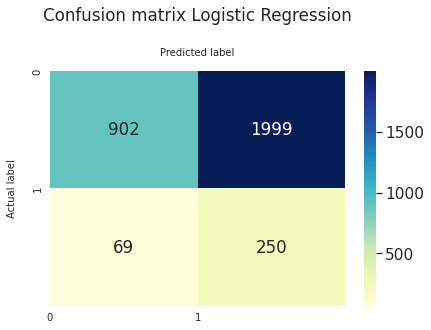

<Figure size 1008x1008 with 0 Axes>

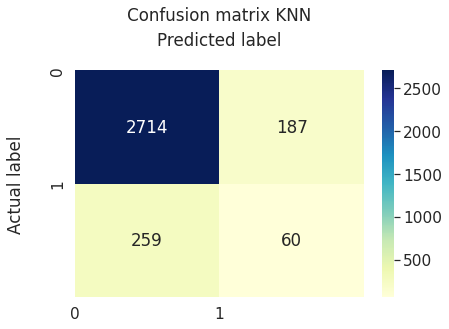

<Figure size 1008x1008 with 0 Axes>

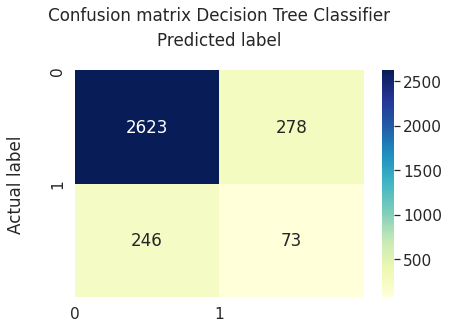

<Figure size 1008x1008 with 0 Axes>

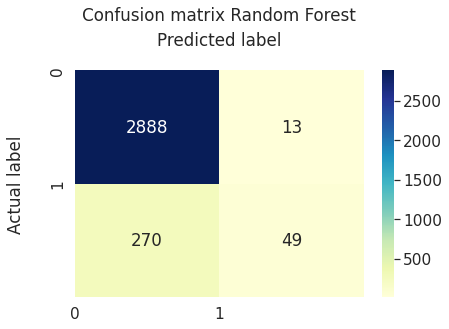

In [78]:
def plot_confusion_map(model, model_name=""):
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  y_pred = (y_pred_proba >= threshold).astype('int') # Lets put the threshold at 0.4 instead of 0.5
  # y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred) 
  df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
  plt.figure(figsize = (14,14))
  fig, ax = plt.subplots()
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
  class_names=[0,1]
  tick_marks = np.arange(len(class_names))
  plt.tight_layout()
  plt.title('Confusion matrix '+model_name+'\n', y=1.1)
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  ax.xaxis.set_label_position("top")
  plt.ylabel('Actual label\n')
  plt.xlabel('Predicted label\n')

  return cm

for model in models:
  classifier_name = model[0]
  classifier = model[1]
  plot_confusion_map(classifier, classifier_name)

We will pick the "Random Forest" model since seems like the one with less False negatives that actually predicts something.

# **Step 16:** Visualize results

We have decided to go with the Random forest since it gives the best results.

In [79]:
classifier_name = "Random Forest"
for model in models:
  if model[0] == classifier_name:
    classifier = model[1]

y_pred_proba = classifier.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= threshold).astype('int') # Lets put the threshold at 0.4 instead of 0.5
# y_pred = classifier.predict(X_test)
X_test.size

99820

On a Confusion Matrix

<Figure size 1008x1008 with 0 Axes>

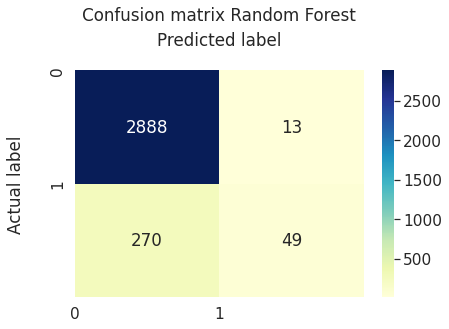

In [80]:
cm = plot_confusion_map(classifier, classifier_name)

As we see in the Graph, we only get a 

In [81]:
print(str(round(cm[1][1]/(cm[1][0]+cm[1][1])*100, 2))+"%")

15.36%


of the people that will churn (False Positive Rate of (FPR = FP/(FP+TN)), which is not a lot, but it's better than nothing. Note that the real challenge is to know the 10% that churn out of the 100% people without having false positives since those would get a discount offered anyways. 

The good thing is that we don't have a lot of false positives, meaning that we won't be offering disscounts to people that won't leave, only to a 

In [82]:
print(str(round(cm[0][1]/(cm[0][0]+cm[0][1])*100, 2))+"%")

0.45%


(True Positive Rate (TPR = TP/(TP*FN)))

Let's evaluate the model using ROC Graph

In [83]:
classifier.fit(X_train, y_train) 
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

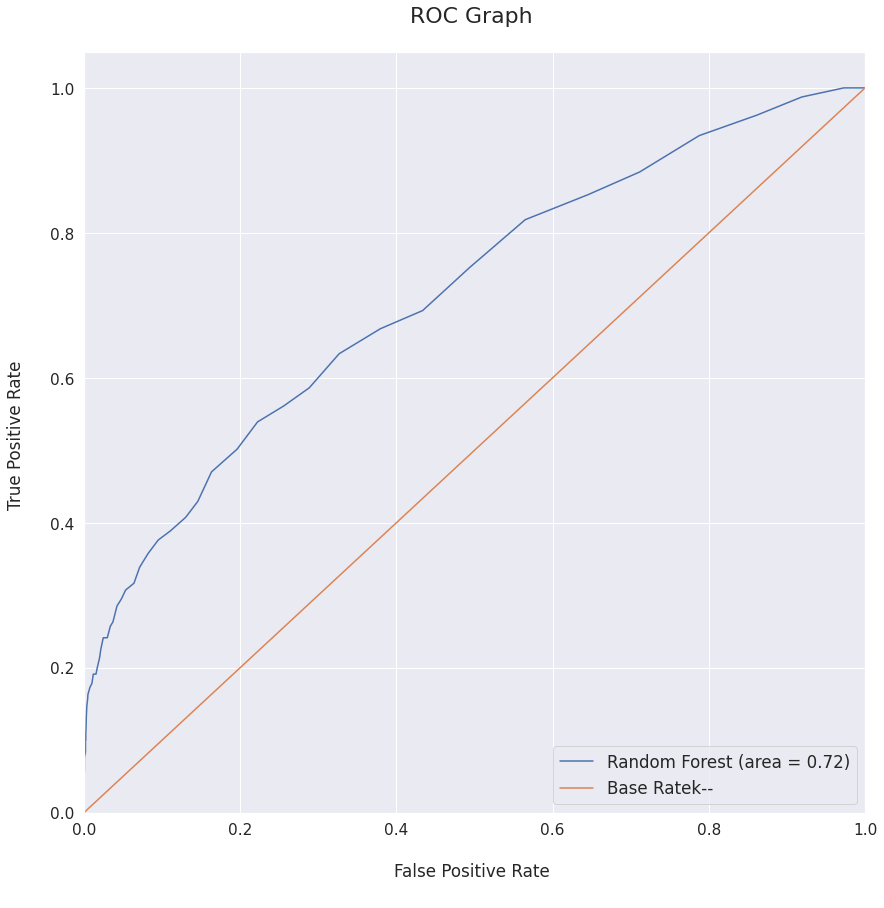

In [84]:
classifier_roc_auc = roc_auc_score(y_test, y_pred_proba )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(14, 14))
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, 
label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

The ROC AUC Score is slightly above 0.7, and it is exactly above 0.7 when the ROC AUC score is considered to be good (it goes from 0.5 to 1: 0.5-0.6 = unsatisfactory, 0.6-0.7 = satisfactory, 0.7-0.8 = good, 0.8-0.9 = very good, 0.9-1.0 = excelent,  ). Improving this score is a task for the future.

This ROC AUC Score refers to the area under the ROC curve. It represents the False Positive Rate against the True Positive Rate, calculated before. And, as we said earlier, our FPR and TPR are very low, which is good and it is shown here.

Now let's take a look at the Brier Score

In [85]:
classifier_brier_score_loss = brier_score_loss(y_test, y_pred_proba )
classifier_brier_score_loss

0.07850649068322982

Now, looking at our Brier Score, our model is very good, since an average Brier Score is of 0.5 since it ranges form 0 to 1, and we want it to be as close to 0 as possible.

Having a low Brier Score means that we have a lot of confidence in our predictions, so if we predict that the costumer will churn or not, it is very likely that we will get it right.

This can easily be seen by our low amount of False Negatives, as we have already seen in the Confusion Map.

In this particular case, it is very good to have this low Brier Score since we want to apply discounts and we know it's a risky strategy, so it's good that we know we will handle them properly.

# **Step 17:** Predict the test

Finally we will predict our tests and leave the solution in the desired format

First of all, we need to preprocess our test data in the same way we did with our train data

In [86]:
def preproc_data(data):
  data.drop(['campaing_code_elect'], axis=1, inplace=True)
  data.drop(null_count.index[1:7],axis=1,inplace=True)
  data['contract_renewal_date'] = data['contract_renewal_date'].fillna((pd.to_datetime(data['contract_end_date'])-pd.DateOffset(years=1)+pd.DateOffset(days=1)).astype(str))
  data['contract_end_date'] = data['contract_end_date'].fillna((pd.to_datetime(data['contract_renewal_date'])+pd.DateOffset(years=1)-pd.DateOffset(days=1)).astype(str))
  data['contract_end_date'] = data['contract_end_date'].fillna((pd.to_datetime(data['contract_activation_date'])+pd.DateOffset(years=3)).astype(str))
  data['contract_last_mod_date'].fillna(data['contract_activation_date'],inplace=True)
  data['fcst_current_discount'].fillna(0,inplace=True)
  data['fcst_price_period_1'].fillna(0,inplace=True)
  data['fcst_price_period_2'].fillna(0,inplace=True)
  data['fcst_price_power_period_1'].fillna(0,inplace=True)
  data['channel'].fillna("empty",inplace=True)
  data['code_elect_campaign_first_subs'].fillna("empty",inplace=True)
  data['gross_margin_power_elect'].fillna(data['gross_margin_power_elect'].mean(),inplace=True)
  data['net_margin_power_elect'].fillna(data['net_margin_power_elect'].mean(),inplace=True)
  data['total_net_margin'].fillna(data['total_net_margin'].mean(),inplace=True)
  data['subscribed_power'].fillna(data['subscribed_power'].mean(),inplace=True)

  data = data.fillna(data.mode().iloc[0])
  encode_binary(data)
  encode_dates(data)
  data_exponential = data[["elect_cons_at_12m",
                          # "gas_cons_at_12m", # only 2920 > 0 (out of 16096)
                          # "elect_cons_last_month", # only 10808 > 0 (out of 16096)
                          "fcst_consumption_elect_12m",
                          # "fcst_consumption_elect_cal_year", # only 9573 > 0 (out of 16096)
                          # "current_paid_consumption", # only 9548 > 0 (out of 16096)
                          "total_net_margin"
                          ]]
  data_exponential = data_exponential[~(data_exponential<=0)]
  data_exponential = np.log(data_exponential)
  data_exponential = data_exponential.fillna(data_exponential.median())
  data[data_exponential.columns] = data_exponential

  data_numeric = data._get_numeric_data()
  data_numeric = data_numeric.loc[:, (data_numeric.nunique() > 10)]
  Q1 = data_numeric.quantile(0.25)
  Q3 = data_numeric.quantile(0.75)
  IQR = Q3 - Q1
  data_numeric = data_numeric.loc[:, (IQR != 0)]
  data_numeric = data_numeric[~((data_numeric < (Q1 - 1.5 * IQR)))].fillna(Q1 - 1.5 * IQR)
  data_numeric = data_numeric[~((data_numeric > (Q3 + 1.5 * IQR)))].fillna(Q3 + 1.5 * IQR)
  # data_numeric = data_numeric[~((data_numeric < (Q1 - 1.5 * IQR)))].fillna(data_numeric.median())
  # data_numeric = data_numeric[~((data_numeric > (Q3 + 1.5 * IQR)))].fillna(data_numeric.median())
  data[data_numeric.columns] = data_numeric

  first_campaign = data[["code_elect_campaign_first_subs"]]
  first_campaign = first_campaign[~(first_campaign!="empty")].fillna(1)
  first_campaign = first_campaign[~(first_campaign=="empty")].fillna(0)
  first_campaign.describe().T
  data[first_campaign.columns] = first_campaign
  identity = data["contract_id"]
  data = data.drop(columns="contract_id")
  data= pd.get_dummies(data)
  data = pd.concat([data, identity], axis = 1)

  return data

test = preproc_data(test)
test.set_index('contract_id', inplace=True)
test


1 columns were label encoded: ['client_got_gas']
4 columns were label encoded: ['contract_activation_date', 'contract_end_date', 'contract_last_mod_date', 'contract_renewal_date']


/tmp/ipykernel_245767/828564023.py:41: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_numeric = data_numeric[~((data_numeric < (Q1 - 1.5 * IQR)))].fillna(Q1 - 1.5 * IQR)
/tmp/ipykernel_245767/828564023.py:42: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_numeric = data_numeric[~((data_numeric > (Q3 + 1.5 * IQR)))].fillna(Q3 + 1.5 * IQR)


,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,channel_empty,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf
contract_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
710982830de1987358b8b4b6a61de5f9,9.944342,0,822.000,1.333066e+09,1459296000,1.333066e+09,1.427760e+09,6.706954,0.000000,0.0,33.388612,0.216739,0.093374,36.304427,0,0.000000,-0.049875,-0.047426,1,5.492569,4.0,1,15.600595,0,0,0,0,0,0,0,1
3926d484a1059ccd604cdfe119243c17,11.632192,0,8865.625,1.271722e+09,1461110400,1.271722e+09,1.429574e+09,8.324633,5033.244045,0.0,110.547310,0.129331,0.070760,33.269175,0,476.398531,27.132080,25.799924,1,5.814865,6.0,1,30.881188,1,0,0,0,0,0,0,0
2e6ca8c451ea3f1d4adbbc5410139ef3,8.042699,0,0.000,1.314922e+09,1472774400,1.436659e+09,1.441238e+09,5.766463,0.000000,0.0,13.415290,0.159079,0.000000,36.304427,0,0.000000,12.568537,11.951435,1,3.178177,4.0,1,11.627439,0,0,0,0,1,0,0,0
6f0ed653c8d261b6546941ffd6ddb72b,11.896349,82487,8865.625,1.325030e+09,1482883200,1.401149e+09,1.451347e+09,8.055945,2543.965602,0.0,110.381074,0.130830,0.072592,33.269175,1,218.985402,6.857833,6.521121,3,6.002711,4.0,1,34.795183,0,0,0,0,1,0,0,0
990945bb72c0badc725c969d25b065bc,8.683047,0,149.000,1.350950e+09,1477180800,1.350950e+09,1.445731e+09,5.815719,0.000000,0.0,97.688913,0.130830,0.072592,33.677598,0,0.000000,57.506044,54.682560,1,3.852826,3.0,1,31.004266,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6bcd3ceaca115a93e0de7ce0695e747d,8.114025,0,246.000,1.366589e+09,1461283200,1.366589e+09,1.429747e+09,5.858353,271.648631,0.0,15.260516,0.164725,0.000000,36.304427,0,35.071621,32.219345,30.637410,1,3.516951,3.0,1,13.986045,0,0,0,0,1,0,0,0
43f5f73d4bff9b356f0bd804e4a6d525,8.685416,0,0.000,1.250554e+09,1471478400,1.250554e+09,1.439942e+09,6.415696,0.000000,0.0,5.635419,0.162713,0.000000,36.304427,0,0.000000,19.600933,18.638548,1,3.926657,6.0,1,14.769264,0,0,0,0,1,0,0,0
a4a1f5ead7f5d49575dcbef401500eeb,14.187921,0,8865.625,1.272672e+09,1462060800,1.272672e+09,1.430525e+09,8.507739,5033.244045,0.0,113.024235,0.128553,0.070262,33.269175,0,473.217200,15.635858,14.868155,1,6.339101,6.0,1,20.419626,0,0,0,0,0,1,0,0


Now let's do the prediction!

In [87]:
test_pred_proba = classifier.predict_proba(test)[:, 1]
test_pred = (test_pred_proba >= threshold).astype('int') # Lets put the threshold at 0.4 instead of 0.5
# test_pred = classifier.predict(test)
test["does_churn"] = test_pred
test["prob_of_churn"] = test_pred_proba

In [88]:
output.set_index('contract_id', inplace=True)
output.update(test)
output.reset_index(inplace=True)
output.sort_values(by=['prob_of_churn'], ascending=False, inplace=True)
output

,contract_id,does_churn,prob_of_churn
2725,c0b7dbcae838c20005a08a5a93d10ba4,1.0,0.40
2327,b2326a939e35c9930cd47152321b09fd,1.0,0.40
1768,af746cde31bc82e7262c592a85e0adf7,0.0,0.36
1254,25ac33d516bc673cad5bdc234661bcda,0.0,0.36
743,37d7077da5a390bd087630b59516d3e0,0.0,0.35
...,...,...,...
1423,e57002278064e9c82c466e7098765382,0.0,0.12
643,cd281baf585b10aef7ab4e705f9abb7a,0.0,0.12
190,4431f949af70489fc8087c16a100cc71,0.0,0.12
3067,2149d160d765bf198ac62e7520c0c60b,0.0,0.11


# **Step 18:** Save the file

In Google Colab

In [89]:
# path = '/content/drive/MyDrive/Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_test_output.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   output.to_csv(f)

In working repository

In [90]:
paths = ['Aily Labs - ML case - Churn/Aily - DS Challange - Churn - Data/aily_case_test_output.csv', 'aily_case_test_output.csv']
for path in paths:
    with open(path, 'w', encoding = 'utf-8-sig') as f:
      output.to_csv(f)

# **Step 19:** Check if the 20% disscount strategy is good or bad

Due to time constraints I will just explain how I would do it:

1.   First of all I would need to add the historic data to my model, something I'm not doing currently
1.   Then, I could try to simulate a 20% discount on the historical data of clients that will churn and change its features and all the all the features that would be afected
1.   Use the model to predict on these clients and check if they would still churn or not

Alternatively, we could look at examples of discounts in the past, check what would have happened without that disscount, and check if the results differ.


The reasons why the disscount could not work could go beyond what the data reflects here, for example it could be that: 

*   The costumer service is not the best, that the 
*   Things like your age or the time spent in the company is more relevant
*   Things that can't be prevented or loted with our data like people moving places
*   Etcetera



What I will do is check what were the most relevant features in our model:

Text(0.5, 0, 'Random Forest Feature Importance')

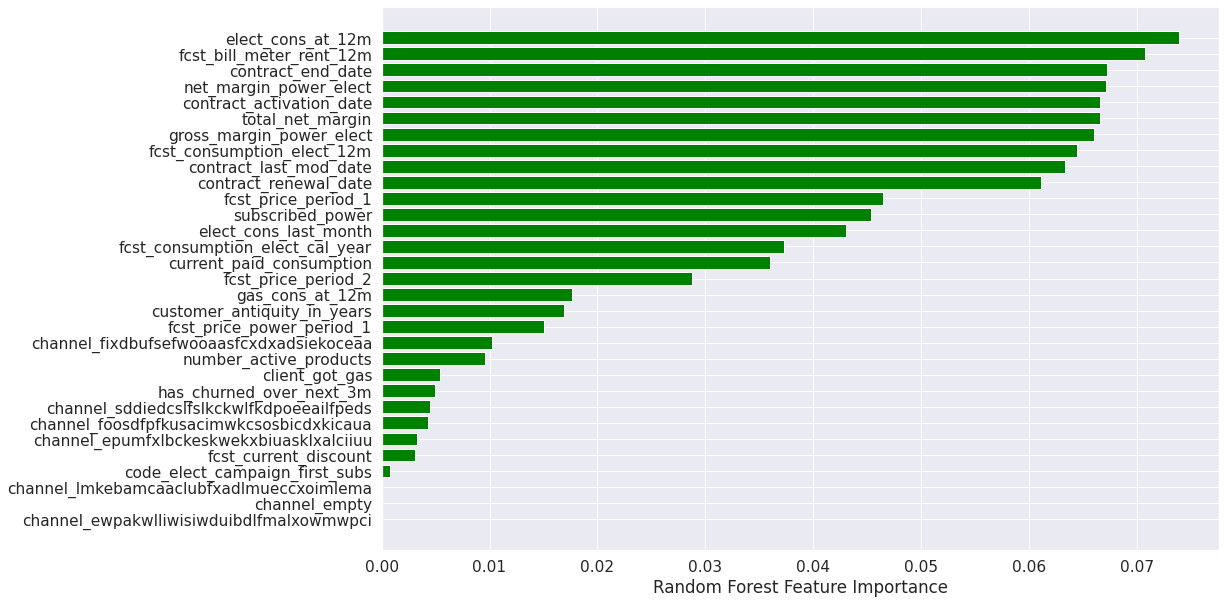

In [91]:

plt.figure(figsize=(15,10))
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], classifier.feature_importances_[sorted_idx], color="green")
plt.xlabel("Random Forest Feature Importance")

Here we can clearly see how the "electricity consumption of the past 12 months" is the most relevant feature, which makes sense, since if you weren't using electricity at all, you wouldn't care on what company you have (or maybe the other way around, you would want a different provider that satisfy your needs better).

In hindsight, I think I should have deleted the "channel" feature, as it already had lots of nulls, could give me problems in the future and wasn't relevant at all, not even adding all the dummies for it.

# **Step 20:** Conclusion

In conclusion, looking at the different metrics we have analyzed like the ROC Curve or the Brief score, our model is good enough to correctly analyze the mayority of cases without error (without too many false positives and negatives).

Further improvements on the model include:
*   Cast the historical data in a manner that it is relevant to the result (the casting and treatment of the hist data done here, didn't improve the algorithm performance)
*   Find a good way to treat the null values in those features that had > 50% of null values
*   Fine tune the model
*   Determine precisely if the 20% discount would be effective

And regarding the 20% discount solution, if we take a look at the most relevant features, we can see that 2 out of the top 5 most relevant are not money/consumption related, so maybe there are better solutions to solve the churn issue. In this case those variables are "contract_end_date" and "contract_activation_date", so two solutions could be:
*   Offer easier ways to extend your contract (they don't need to be cheaper, just easier)
*   Incentives to get people in, since very probably it is very likely that you won't leave if you have just started your contract

Those are my solution, conclusions and I'm content with the result. :)



# **The End**

This was an incredible project, it took much more than I originally expected, but I didn't mind since I was enjoying it so much. I even learned lots of things while doing it too, so I couldn't be happier!

I really hope you find it easy to read, that you like it and that you I can hear more about all of you soon! :)

<3